<h1 style="text-align: center; font-size: 1000%; text-decoration: underline;">Lab 8</h1>
<h2 style="text-align: center; font-size: 500%; text-decoration: underline;">Part 2</h2>
<h2 style="text-align: center; font-size: 250%;">Ido Israeli (ID - 212432439)<br>Jonathan Derhy (ID - 315856377)</h2><br>

<div>
    <h2 style="font-size: 200%">Question 6</h2>
    <p style="font-size:200%">
    Let <u>x</u> $=\left[\genfrac{}{}{0}{}{x_1}{x_2}\right];$ <br><br>
    If $\ f($<u>x</u>$)=a_0 + a_1 x_1 ^2 + a_2 x_2 ^2$ <br><br>
    Then $\ \nabla f($<u>x</u>$)=\left[\genfrac{}{}{0}{}{\frac{\partial f(x)}{\partial x_1}}{\frac{\partial f(x)}{\partial x_2}}\right]
    = \left[\genfrac{}{}{0}{}{2 a_1 x_1}{2 a_2 x_2}\right]$
    </p>
</div>



***



<h2 style="font-size: 200%">The rest of part 2</h2>

In [350]:
import numpy as np
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

<h3>Setting the Parameters</h3>

In [351]:
T = [20, 3 ,200]
params = {'x_0': [[1, 4], [1, 4], [1, 4], [-2, 1], [-2, 1], [-2, 1]],
          'coefficients':[[0, 1, 1], [0, 1, 1], [0, 1, 1], [5, 1, 40], [5, 1, 40], [5, 1, 40]],
          'alpha': [0.1, 0.2, 0.3, 0.01, 0.02, 0.3]}
parameters = pd.DataFrame(data=params)
parameters.index += 1
print(f'The Number of Updates: {T}\n\nThe Parameters:\n{parameters}')

The Number of Updates: [20, 3, 200]

The Parameters:
       x_0 coefficients  alpha
1   [1, 4]    [0, 1, 1]   0.10
2   [1, 4]    [0, 1, 1]   0.20
3   [1, 4]    [0, 1, 1]   0.30
4  [-2, 1]   [5, 1, 40]   0.01
5  [-2, 1]   [5, 1, 40]   0.02
6  [-2, 1]   [5, 1, 40]   0.30


<h3>Functions</h3>

In [352]:
# 
def to_col_vect(v):
    if type(v) == np.ndarray:
        if v.shape == (2, 1):
            return v
    return np.atleast_2d(v).T

In [353]:
# 
def functionValue(x, coefficients):
    if type(x) != np.ndarray: x = to_col_vect(x)
    if type(coefficients) != np.ndarray: coefficients = np.array(coefficients)
    return coefficients[0] + coefficients[1]*(x[0][0]**2) + coefficients[2]*(x[1][0]**2)

# 
def functionDerivativeValue(x, coefficients):
    if type(x) != np.ndarray: x = to_col_vect(x)
    if type(coefficients) != np.ndarray: coefficients = np.array(coefficients)
    return to_col_vect([2*coefficients[1]*x[0][0], 2*coefficients[2]*x[1][0]])

# ---------------------------------------------------------------------------------
def functionValuesFromDataFrame(df):
    f = []
    for idx in range(df.shape[0]):
        f.append(functionValue(df["x_0"].iloc[idx], df["coefficients"].iloc[idx]))
    return f
# ---------------------------------------------------------------------------------

# 
def functionValues(X, coefficients):
    f = []
    for x in X:
        f.append(functionValue(x, coefficients))
    return f

# 
def functionDerivativeValues(X, coefficients):
    f_tag = []
    for x in X:
        temp = functionDerivativeValue(x, coefficients)
        # print(f'\n\ntemp [shape {temp.shape}]:\n{temp}\n')
        f_tag.append(temp)
    return f_tag

In [354]:
# 
def gradientStep(alpha, x, coefficients):
    return to_col_vect(x) - alpha*functionDerivativeValue(x, coefficients)

# 
def gradientTsteps(T, alpha, x0, coefficients):
    steps = [to_col_vect(x0)]
    for t in range(T):
        steps.append(gradientStep(alpha, steps[t], coefficients))
    return steps

In [355]:
# 
def draw_parameter_updates_in_gradient_descent(Xt):
    for idx in range(1, len(Xt)):
        curr_x1 = Xt[idx-1][0][0]
        curr_x2 = Xt[idx-1][1][0]
        dx1 = Xt[idx][0][0] - curr_x1
        dx2 = Xt[idx][1][0] - curr_x2
        plt.arrow(curr_x1, curr_x2, dx1, dx2, length_includes_head=True, head_width=0.02, ec='b', fc='r')
        
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.title('Parameters after each Update in Gradient Descent')
    return

# 
def calc_and_draw_parameter_updates_in_gradient_descent(T, alpha, x0, coefficients):
    Xt = gradientTsteps(T, alpha, x0, coefficients)
    title = (
            fr'T={T}, $\alpha={alpha}$, $x_0 = {x0}$ '+
            fr'and the coefficients are '+
            fr'$a_0={coefficients[0]},\ a_1={coefficients[1]}\ and\ a_2={coefficients[2]}$'
            )
    
    f = plt.figure()
    f.suptitle(title, fontweight ="bold")
    f.set_figwidth(14)
    f.set_figheight(14)

    # drawing the parameters:
    f.add_subplot(2, 1, 1)
    draw_parameter_updates_in_gradient_descent(Xt)

    # drawing the function:
    f.add_subplot(2, 1, 2)
    draw_function_val_after_each_update(Xt, T, coefficients)

    # drawing the derivative:
    f = plt.figure()
    f.suptitle(title, fontweight ="bold")
    f.set_figwidth(10)
    f.set_figheight(10)
    ax = plt.axes(projection='3d')
    draw_function_derivative_val_after_each_update(Xt, T, coefficients, ax)

    plt.show()
    return

# 
def find_axis_lims(T, f_xt, delta):
    infFlag = False
    nonInfIdx = -1
    maxOfFunc = max(f_xt)
    if maxOfFunc == math.inf:
        infFlag = True
        nonInfIdx = f_xt.index(math.inf)-1
    ymax = f_xt[nonInfIdx] if infFlag else maxOfFunc
    
    infFlag = False
    nonInfIdx = -1
    minOfFunc = min(f_xt)
    if minOfFunc == -math.inf:
        infFlag = True
        nonInfIdx = f_xt.index(math.inf)-1
    ymin = f_xt[nonInfIdx] if infFlag else minOfFunc
    
    xmax = T
    xmin = 0
    return [[xmin-delta, xmax+delta], [ymin-delta, ymax+delta]]

# 
def draw_function_val_after_each_update(Xt, T, coefficients):
    f_xt = functionValues(Xt, coefficients)
    # print(f'\n\nf(x):\n{f_xt}\n\n')
    # return
    plt.plot(list(range(T+1)), f_xt, 'green', marker='.', mec='r')
    plt.xlabel('function iteration')
    plt.ylabel(r'$f(x_t)$')
    plt.title('Function Value after each Parameter Update in Gradient Descent')
    
    lims = find_axis_lims(T, f_xt, 0.5)
    plt.xlim(lims[0])
    plt.ylim(lims[1])
    return

# 
def draw_function_derivative_val_after_each_update(Xt, T, coefficients, ax):
    f_tag_xt = functionDerivativeValues(Xt, coefficients)
    f_tag_x1 = [f_tag[0][0] for f_tag in f_tag_xt]
    f_tag_x2 = [f_tag[1][0] for f_tag in f_tag_xt]
    
    x_ax = f_tag_x1
    ax.set_xlabel(r"$f'(x_1)$")

    y_ax = list(range(T+1))
    ax.set_ylabel('function iteration')

    z_ax = f_tag_x2
    ax.set_zlabel(r"$f'(x_2)$")

    ax.plot3D(x_ax, y_ax, z_ax, 'green', marker='.', mec='r')
    ax.set_title('Function Derivative Value after each Parameter Update in Gradient Descent')

    ax.view_init(10, 20)
    return

# 
def draw_graphs_from_DataFrame(df, T):
    for idx in range(df.shape[0]):
        alpha = df["alpha"].iloc[idx]
        x0 = df["x_0"].iloc[idx]
        coefficients = df["coefficients"].iloc[idx]
        calc_and_draw_parameter_updates_in_gradient_descent(T, alpha, x0, coefficients)
        print(f'\n--------------------------------------------------------------------------------------------------------\n')
    return



---



<h3>When T = 20</h3>

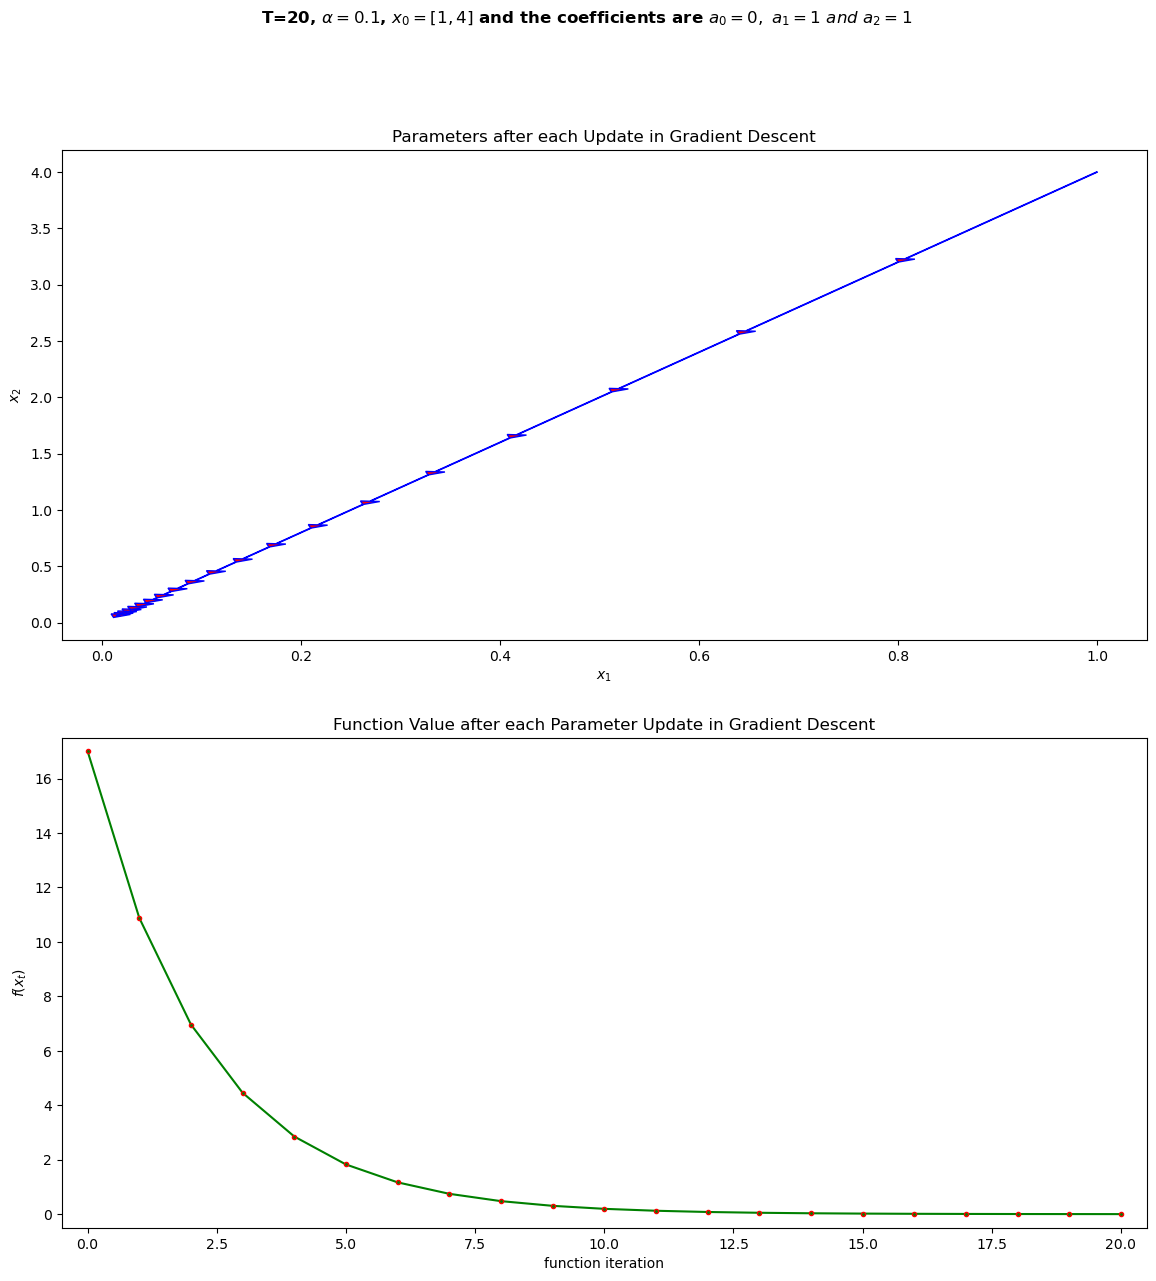

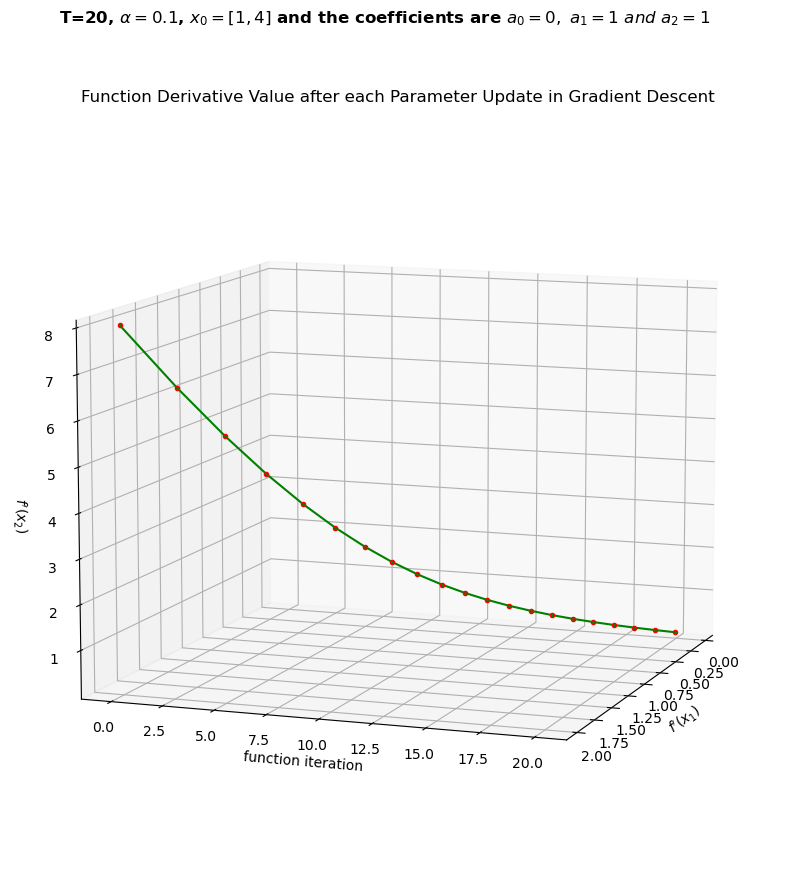


--------------------------------------------------------------------------------------------------------



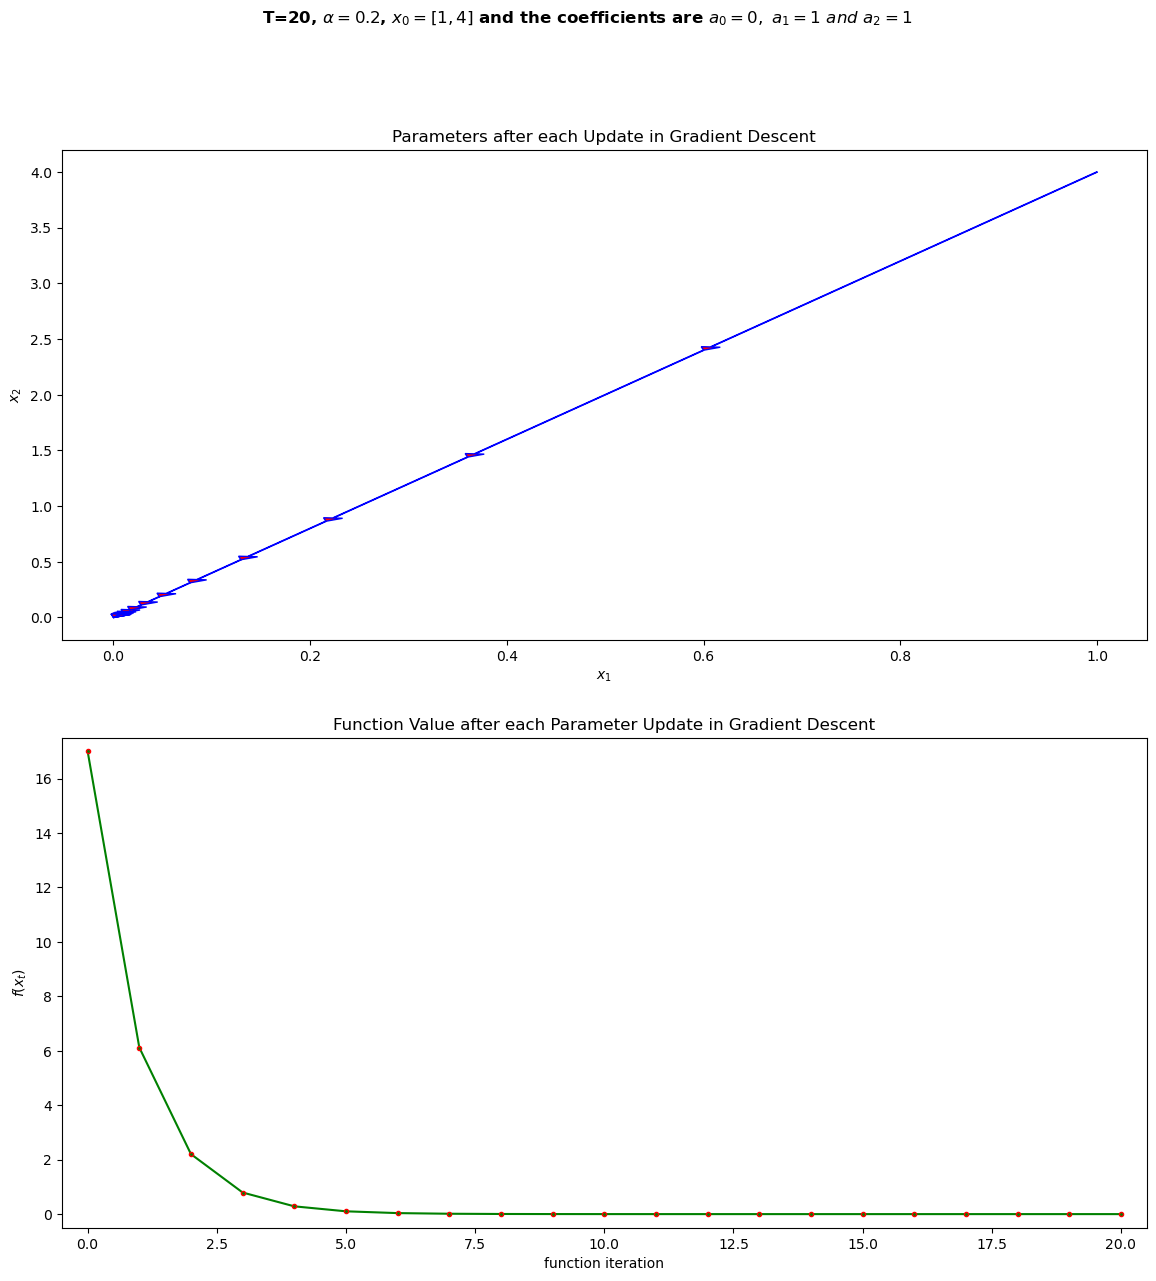

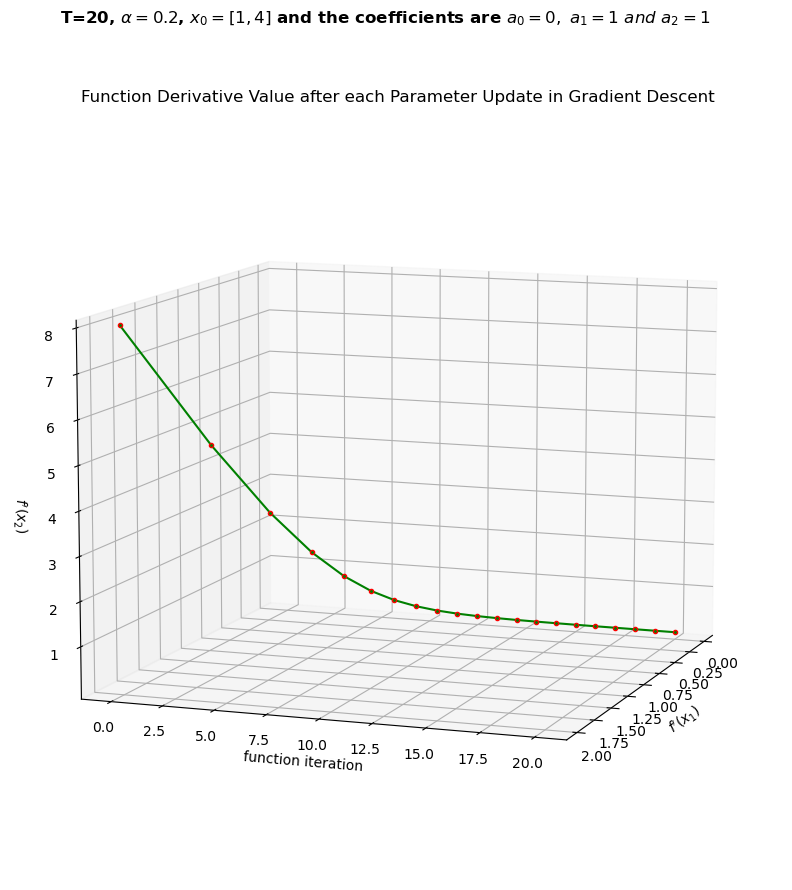


--------------------------------------------------------------------------------------------------------



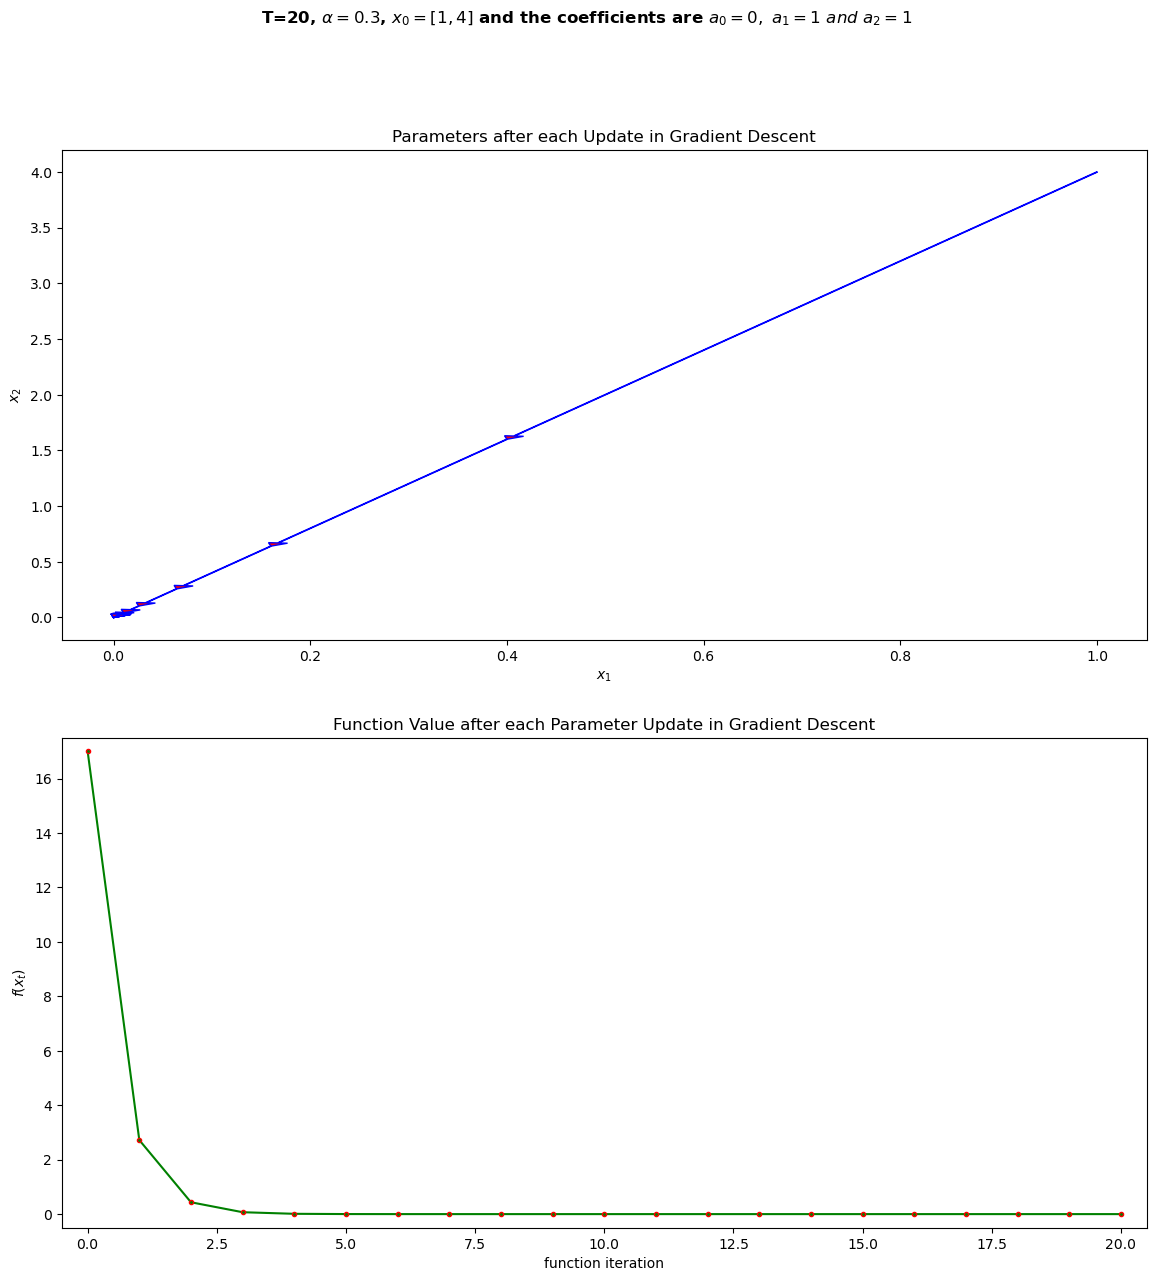

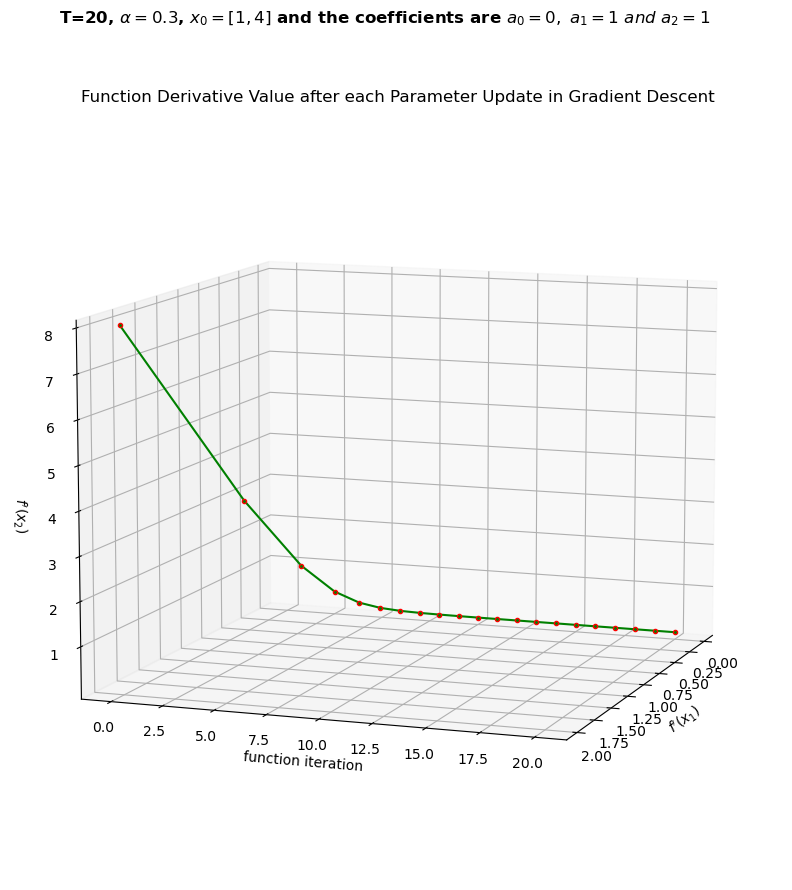


--------------------------------------------------------------------------------------------------------



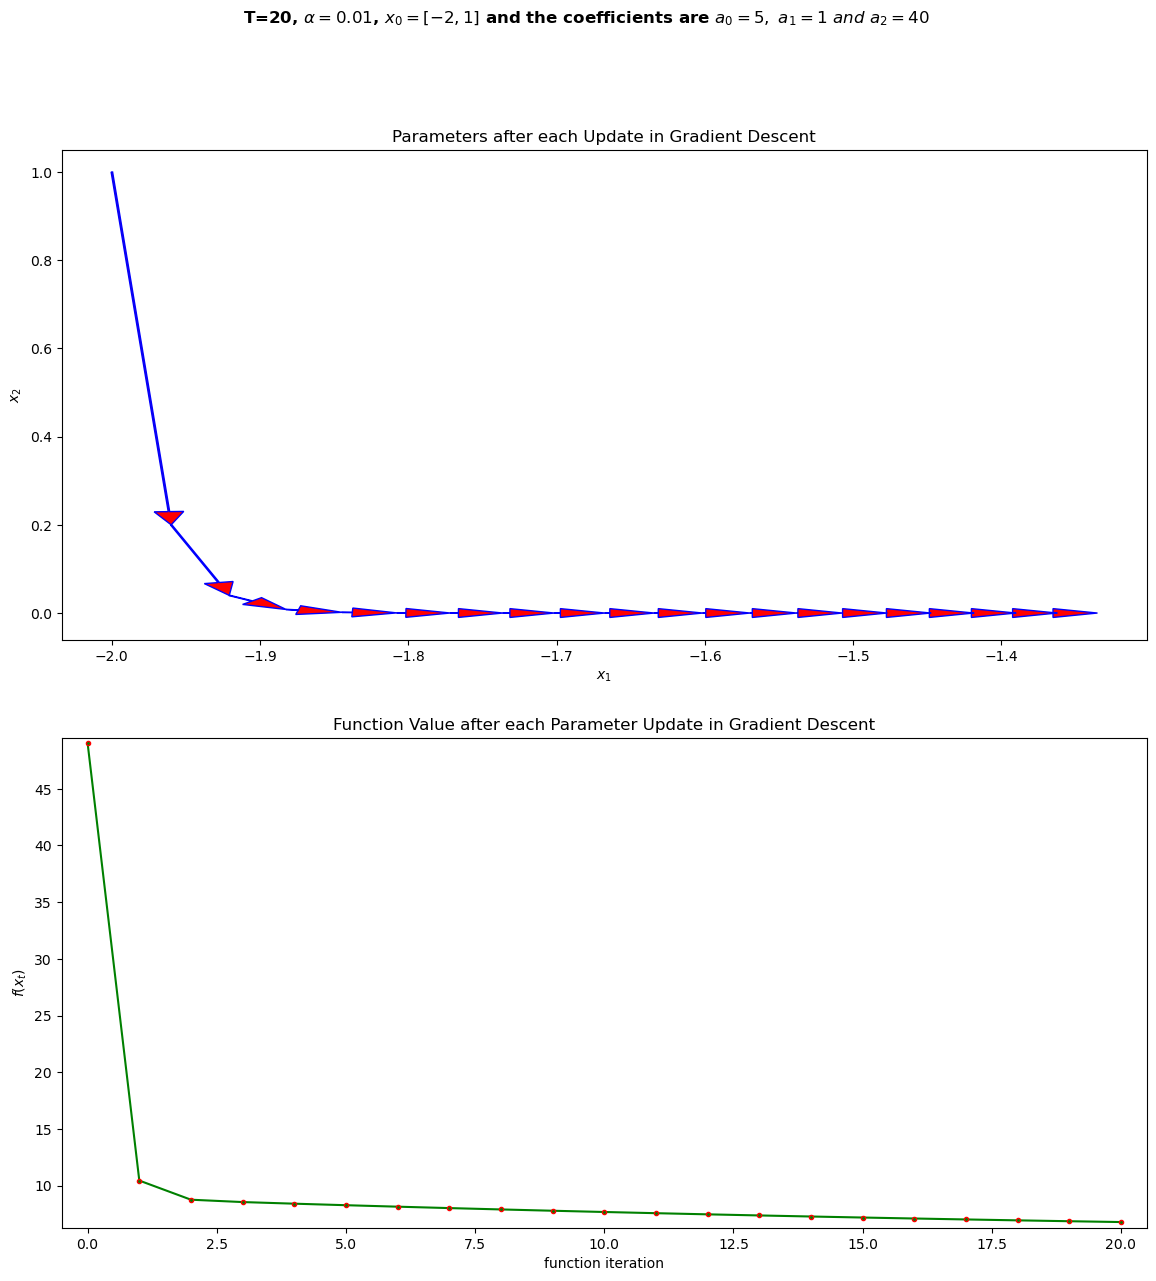

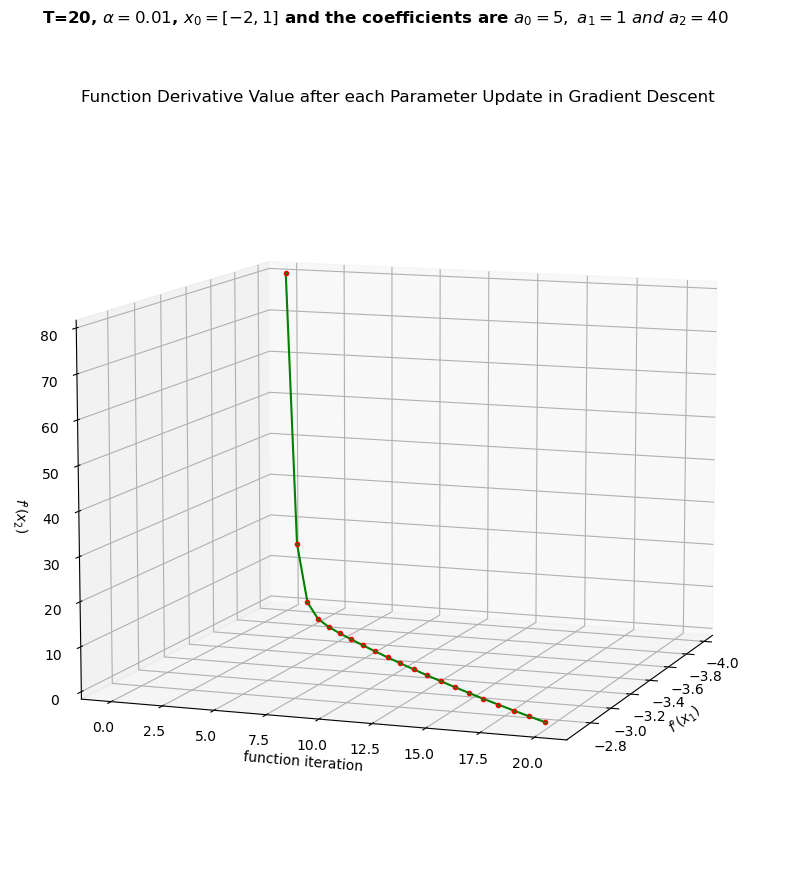


--------------------------------------------------------------------------------------------------------



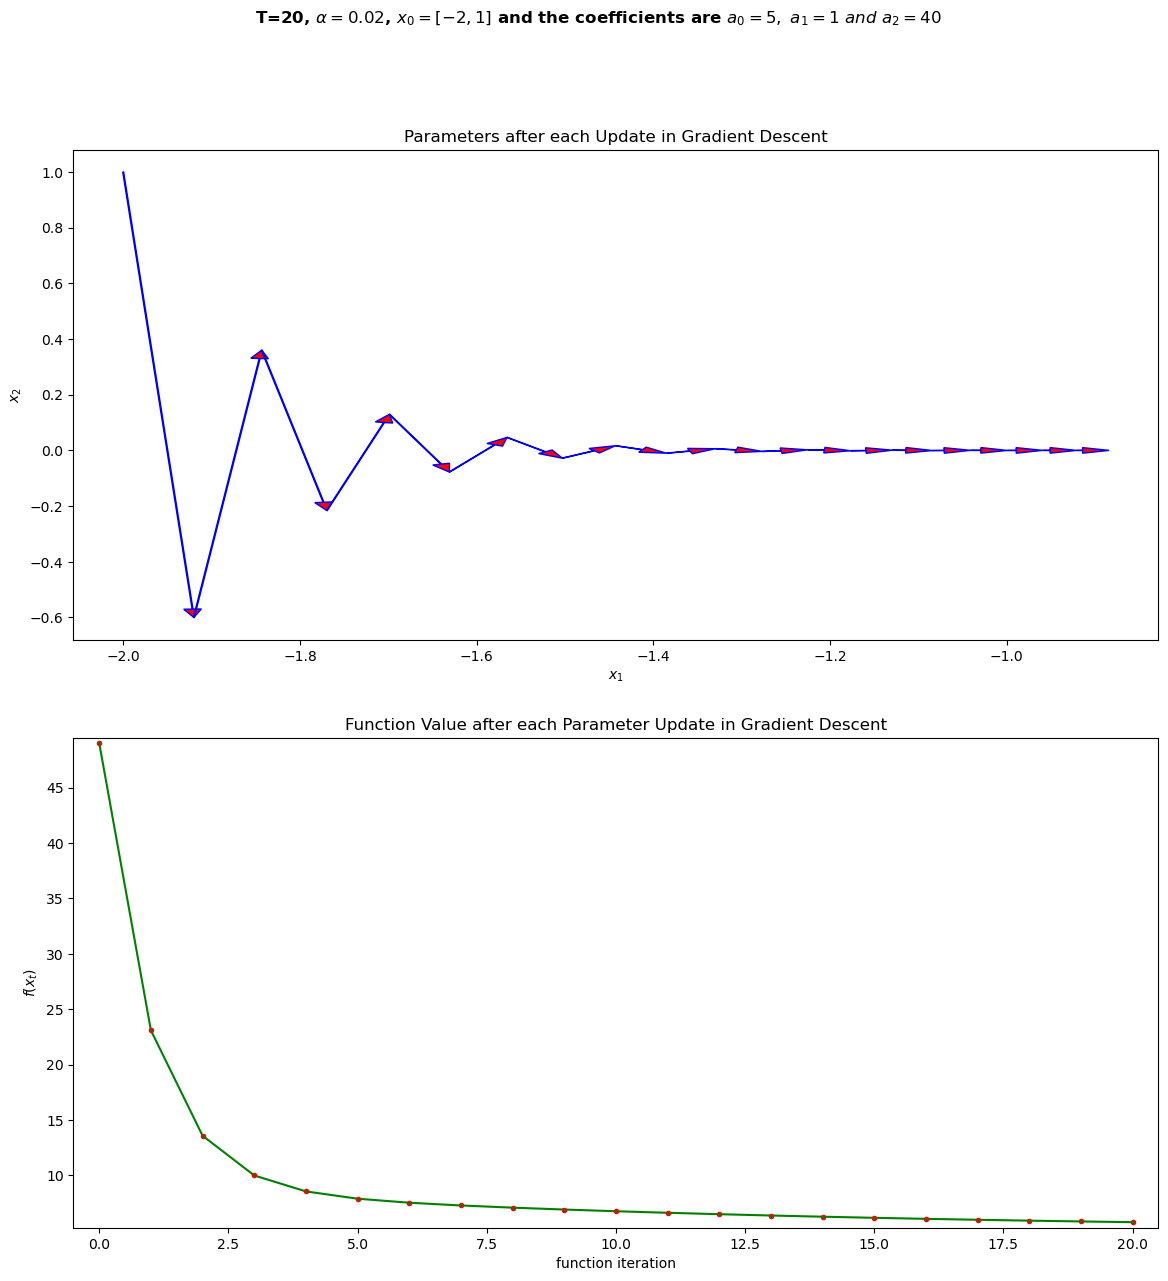

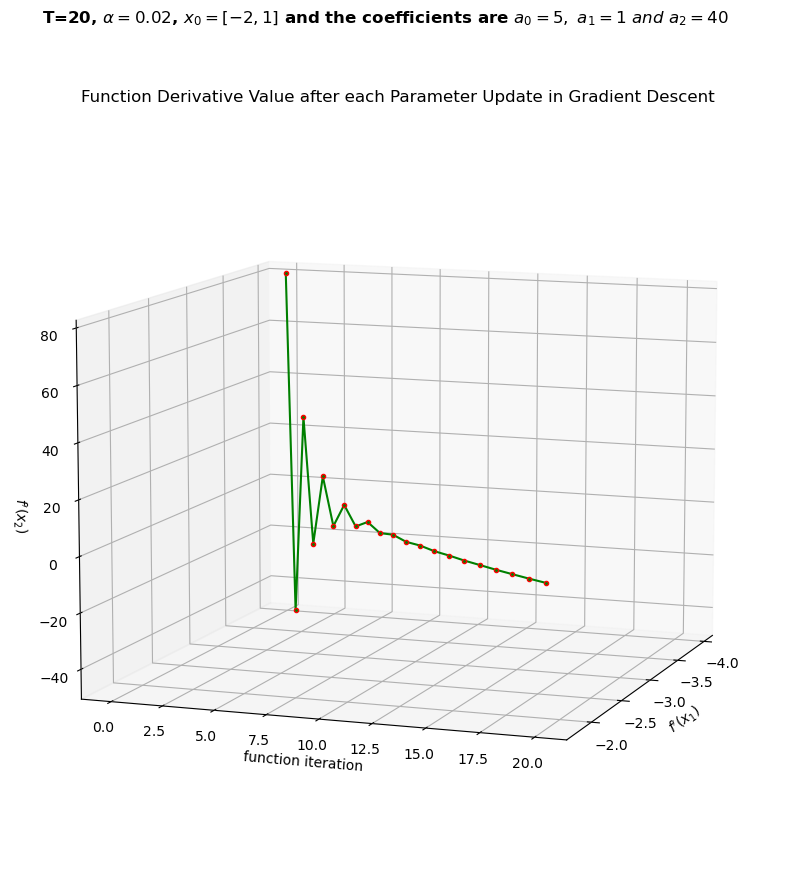


--------------------------------------------------------------------------------------------------------



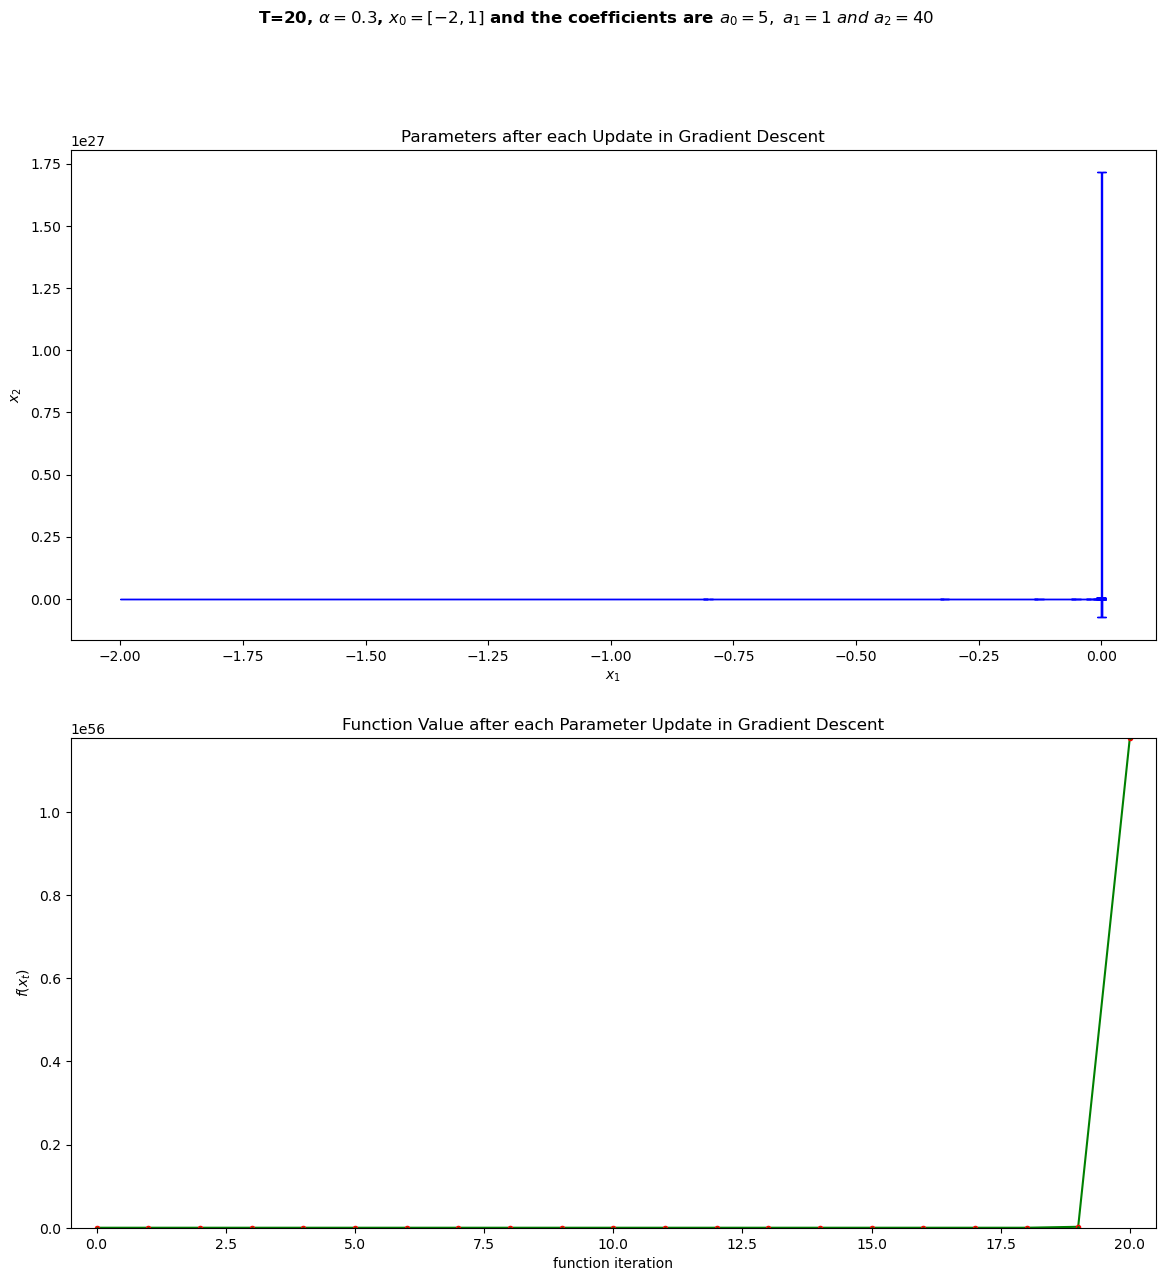

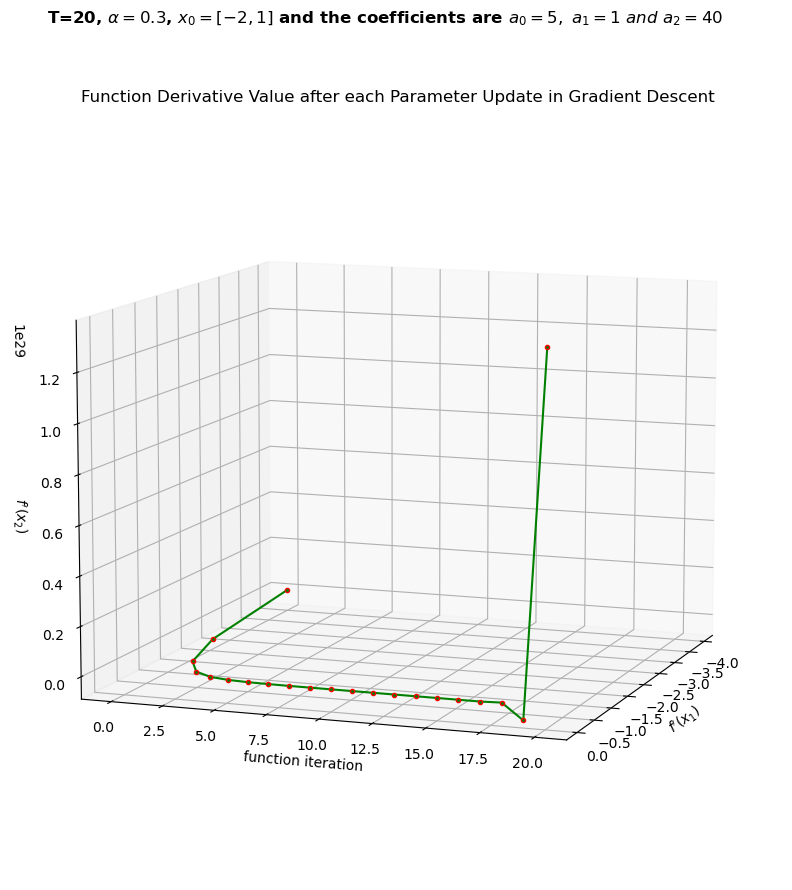


--------------------------------------------------------------------------------------------------------



In [356]:
draw_graphs_from_DataFrame(parameters, T[0])

<div style="font-size: 150%">
    <p>
        In the first three cases, where $\alpha$ equals 0.1, 0.2 and 0.3 in order, because a larger $\alpha$ means larger steps, we arrived at the extrimum's vicinity faster with the a larger $\alpha$.<br>
        In a stark difference to first three cases, the fourth and fifth cases show that the larger steps may make us overshoot and require us to adjust more in order to reach the same minimum, resulting in a longer time (more iterations needed) to arrive at the minimum.<br><br>
        You may notice that in the last case, we have a rather large $\alpha(=0.3)$, rather larger coefficient $(a_2 = 40)$, and as a result our function values bloat (going from $f(x_0)=49$ to $f(x_1)=21165.64$ to $f(x_2)=11193645.1024$ and eventuly to $f(x_{20})=1.1780763349694819\times 10^{56}$).<br>
        What this tells us is that unlike in the fourth and fifth cases, where the larger $\alpha$ made us work harder to reach the same result, sometimes an $\alpha$ that is too large may make us go in a completely different direction (in this case, instead of getting smaller, as we approach a minimum, the function values increase, as if approaching a maximum or infinity (more on that later)).
    </p>
</div>



---



<h3>When T = 3</h3>

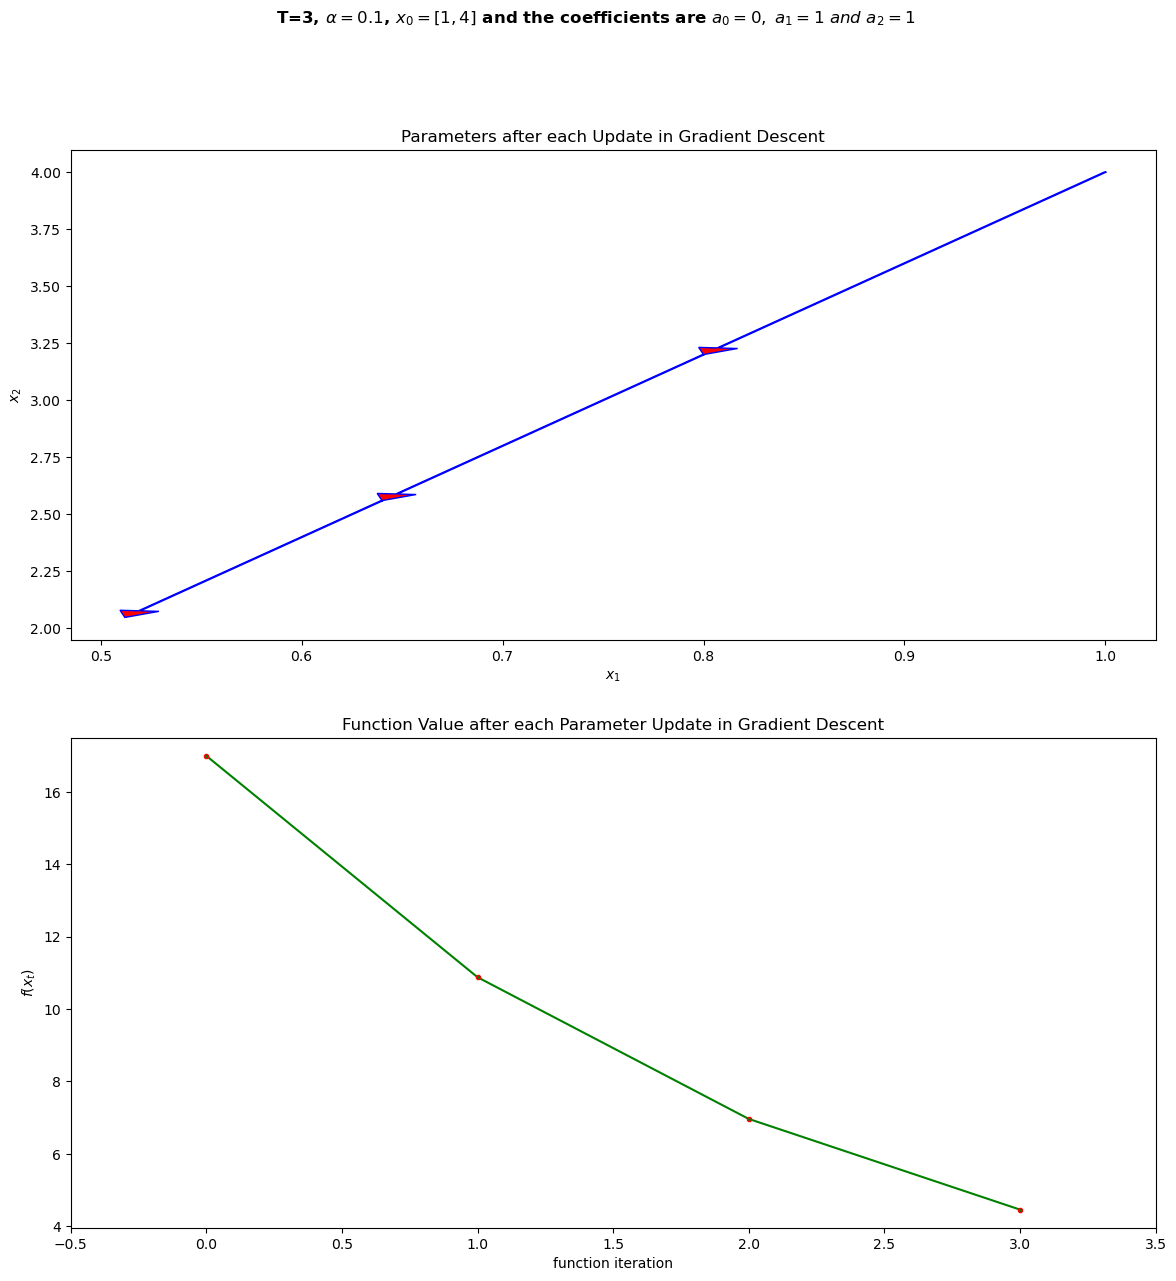

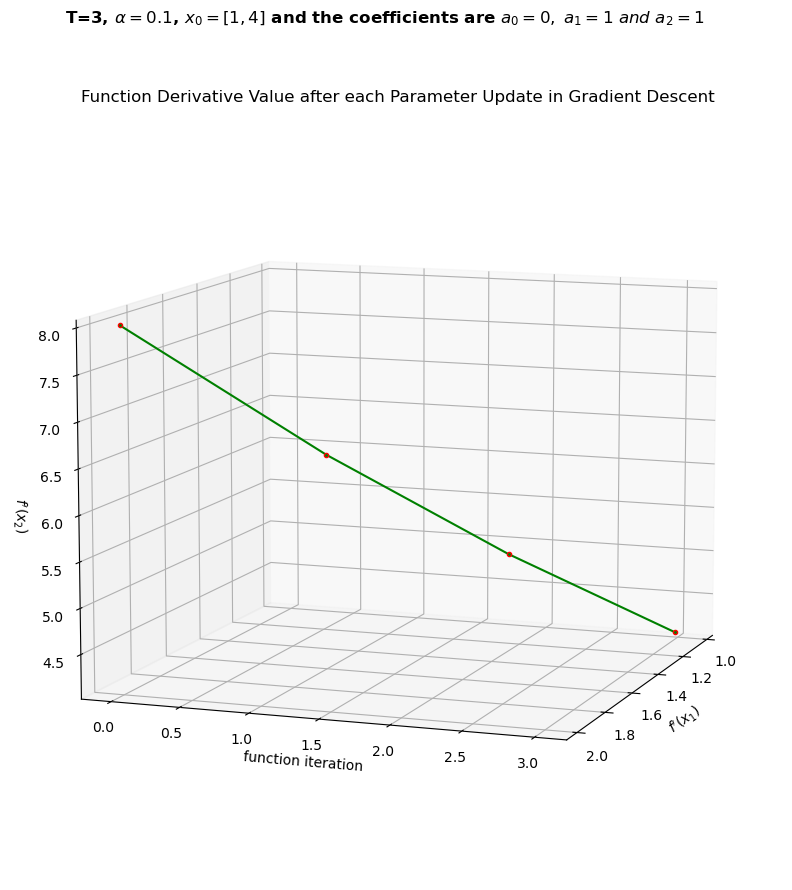


--------------------------------------------------------------------------------------------------------



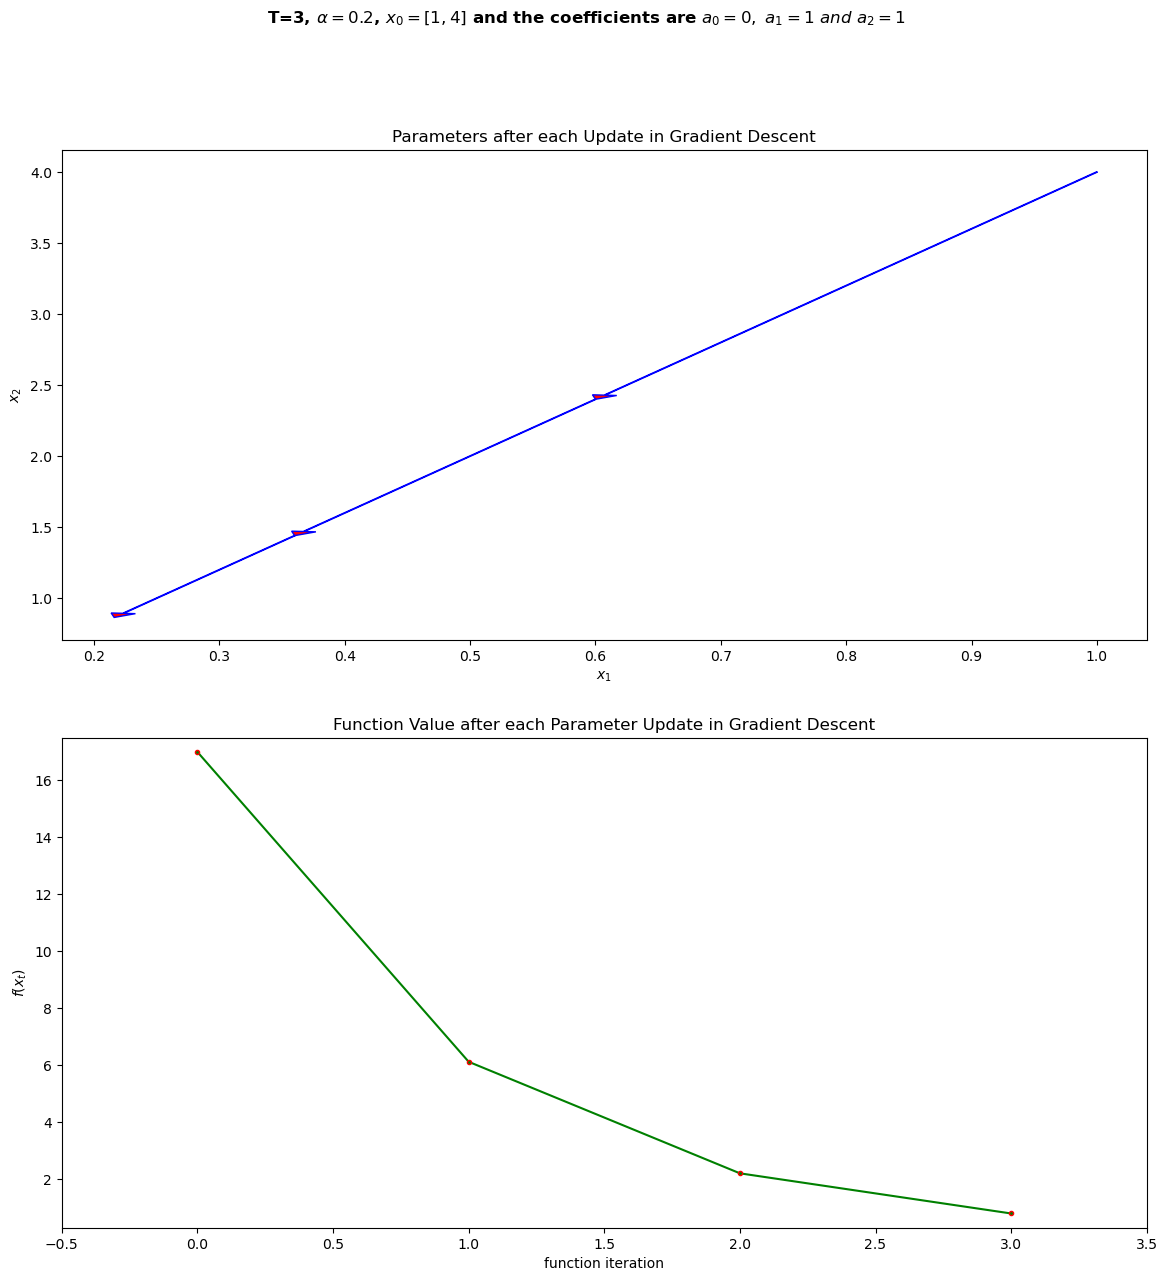

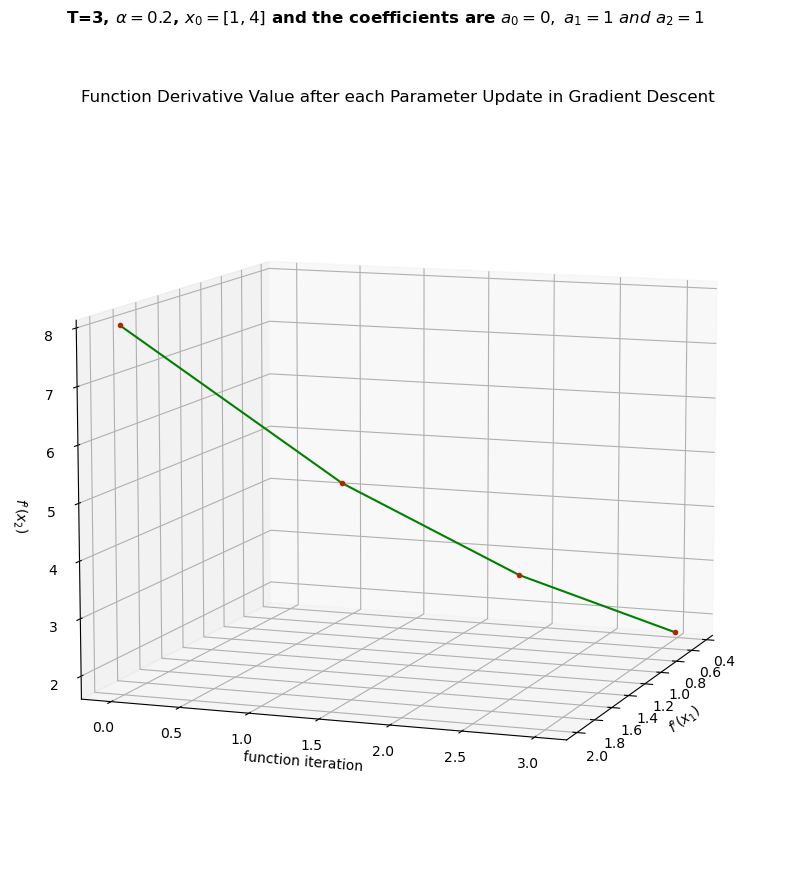


--------------------------------------------------------------------------------------------------------



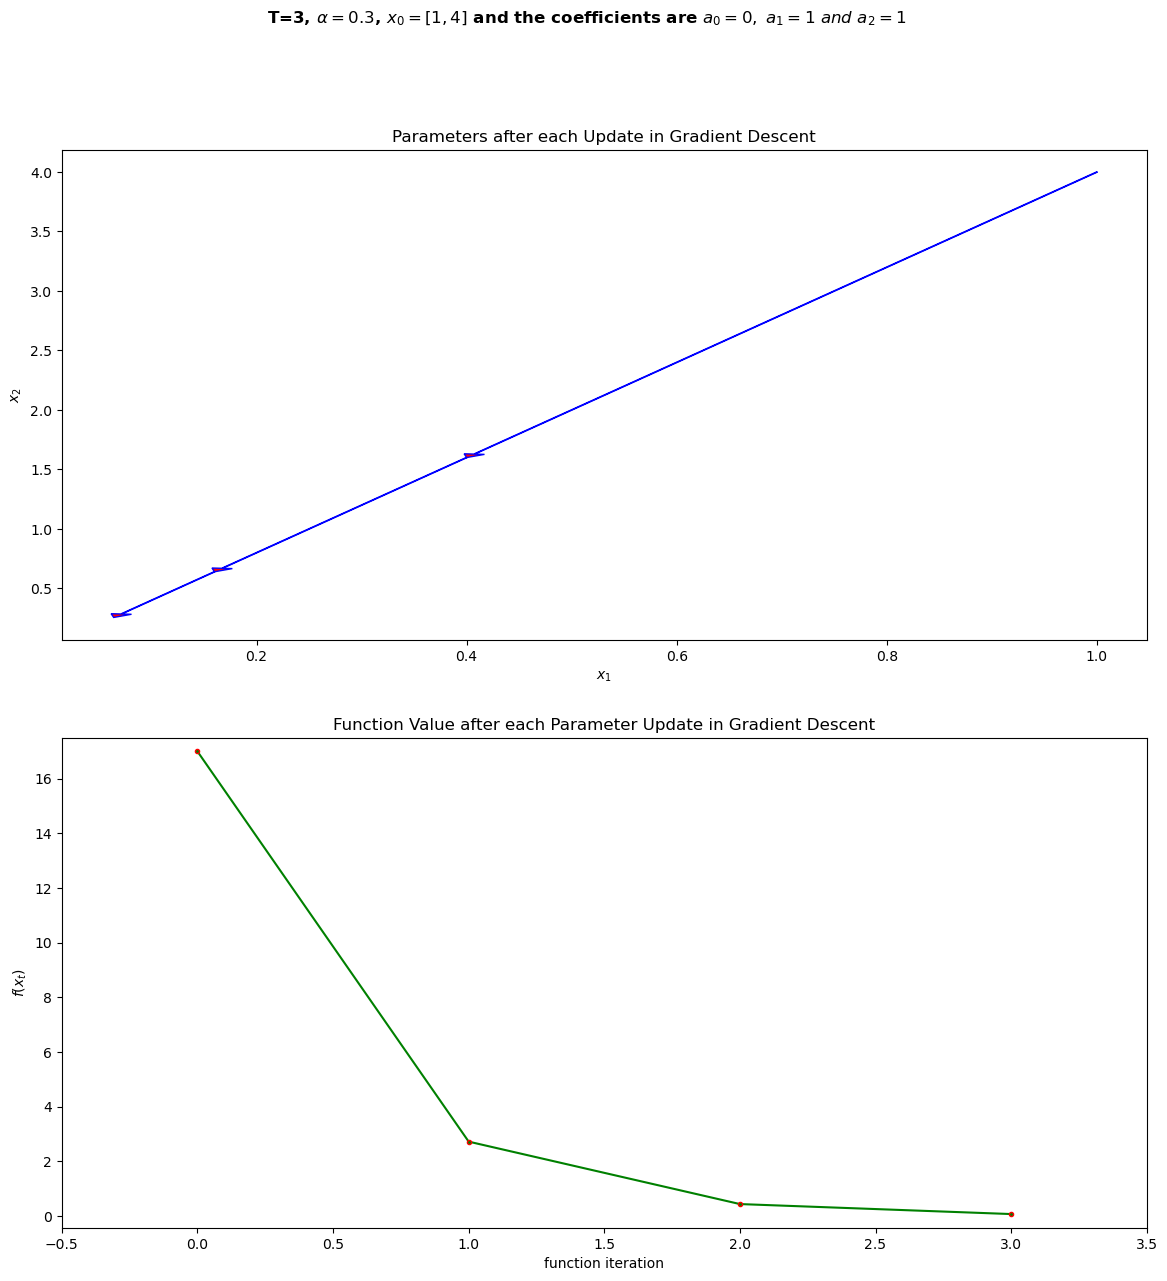

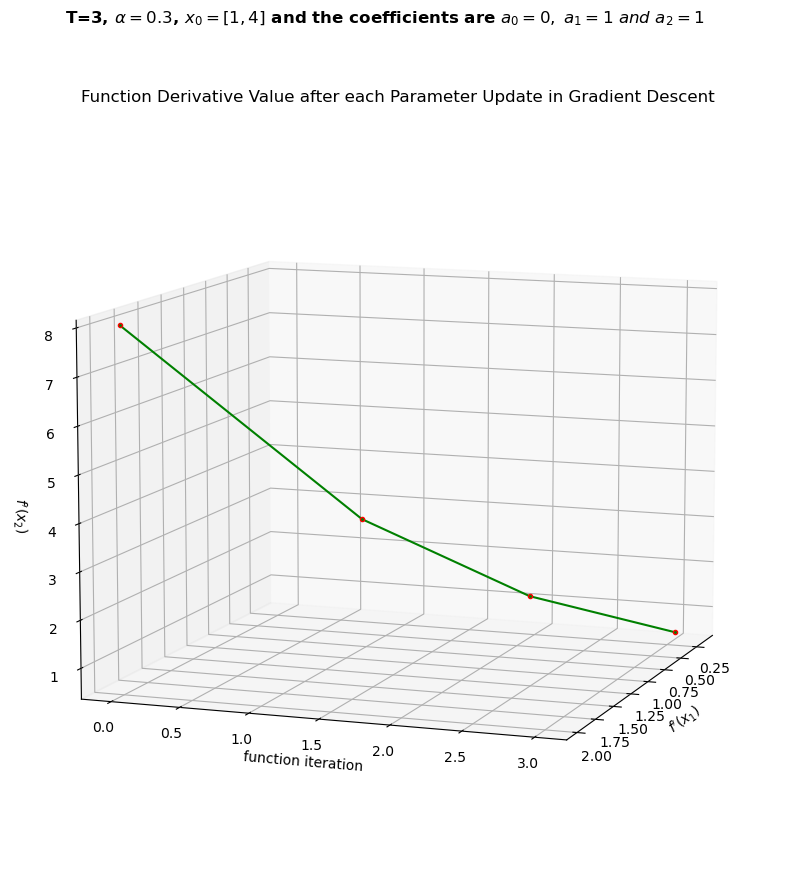


--------------------------------------------------------------------------------------------------------



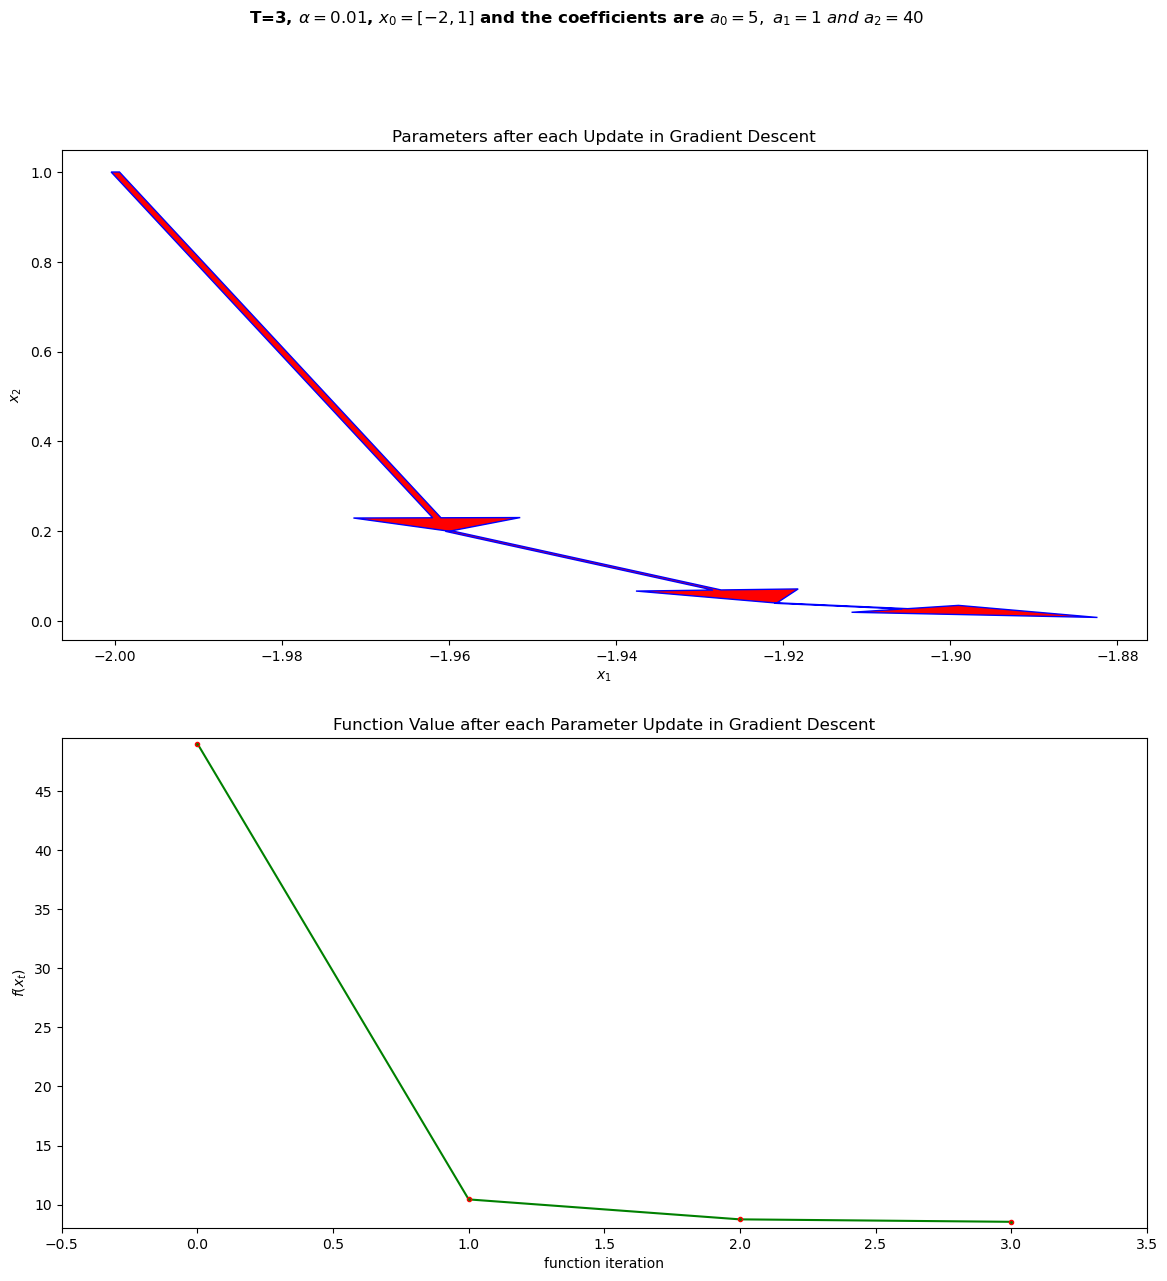

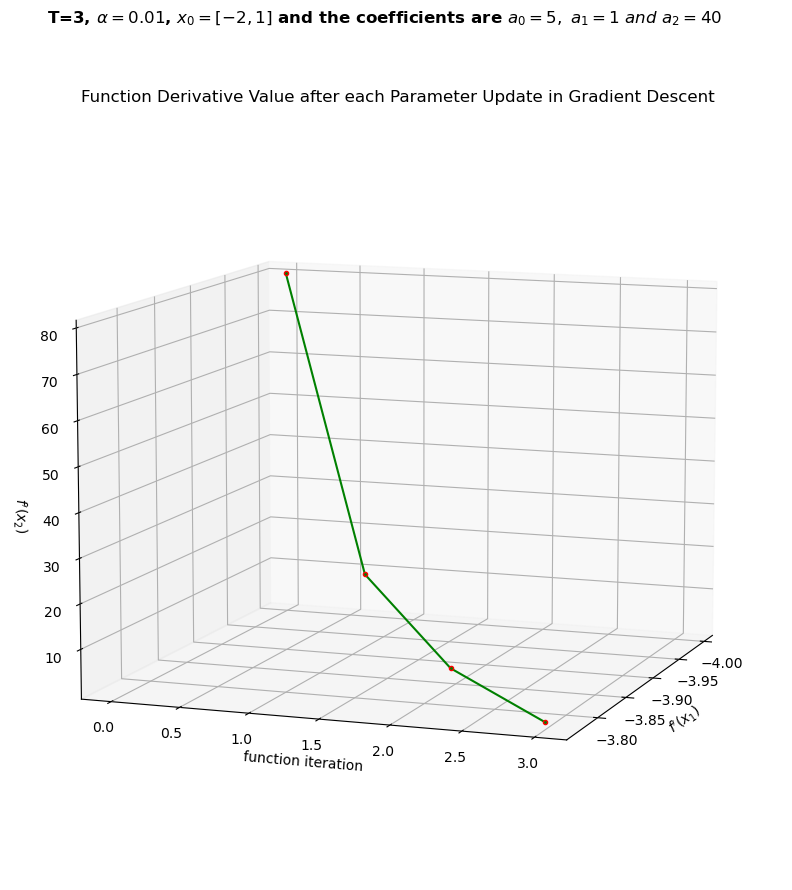


--------------------------------------------------------------------------------------------------------



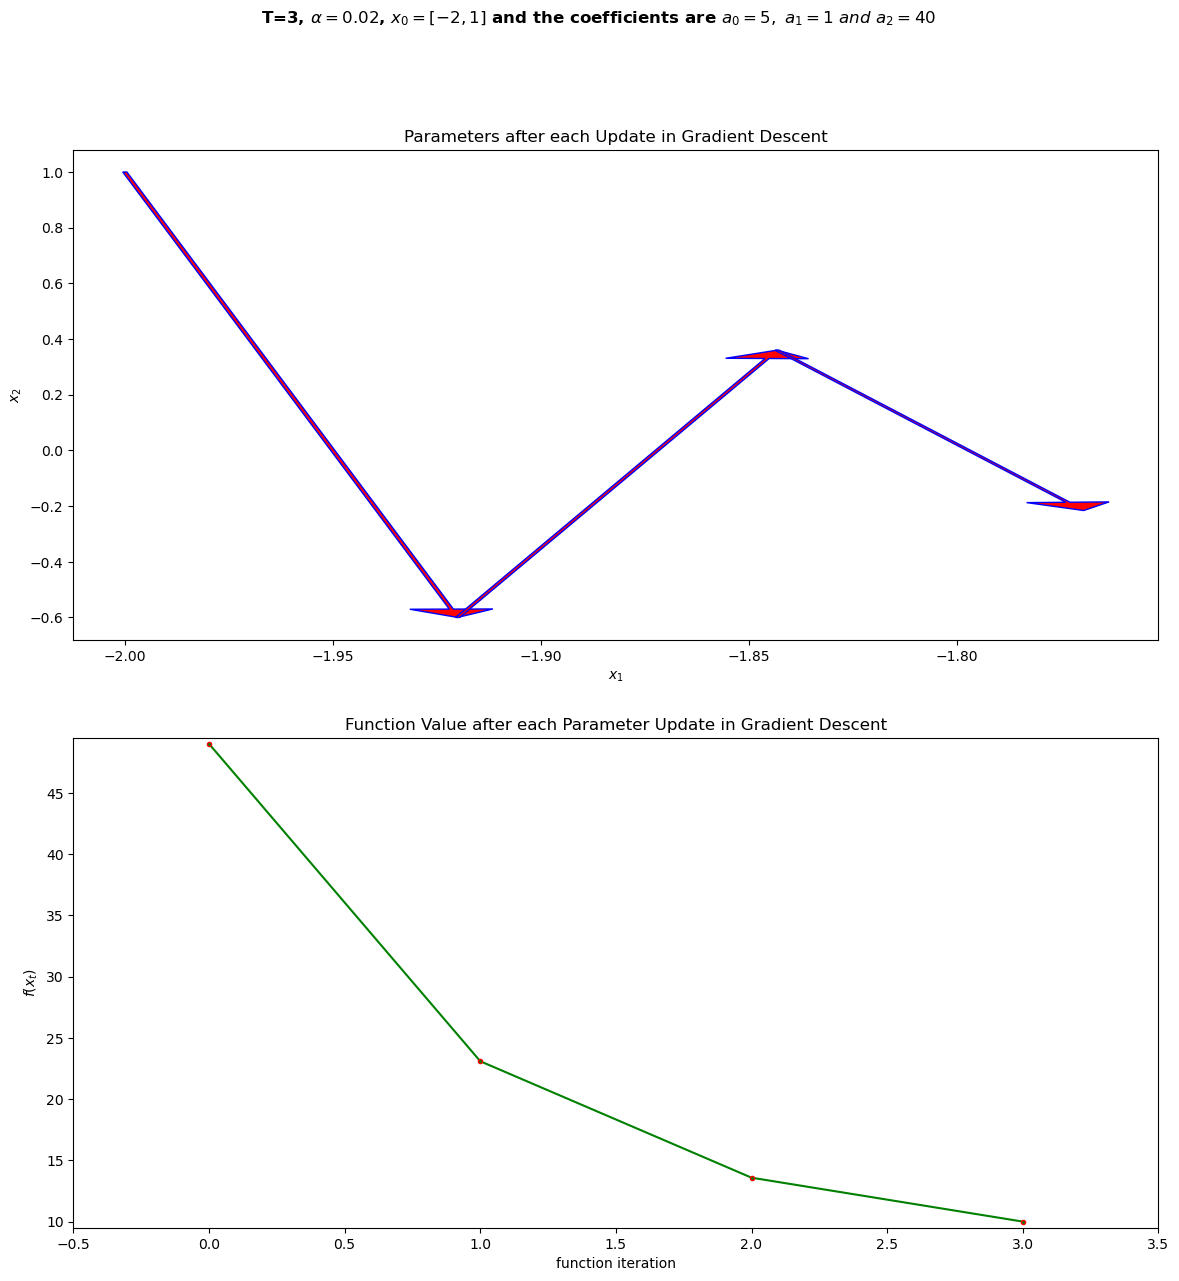

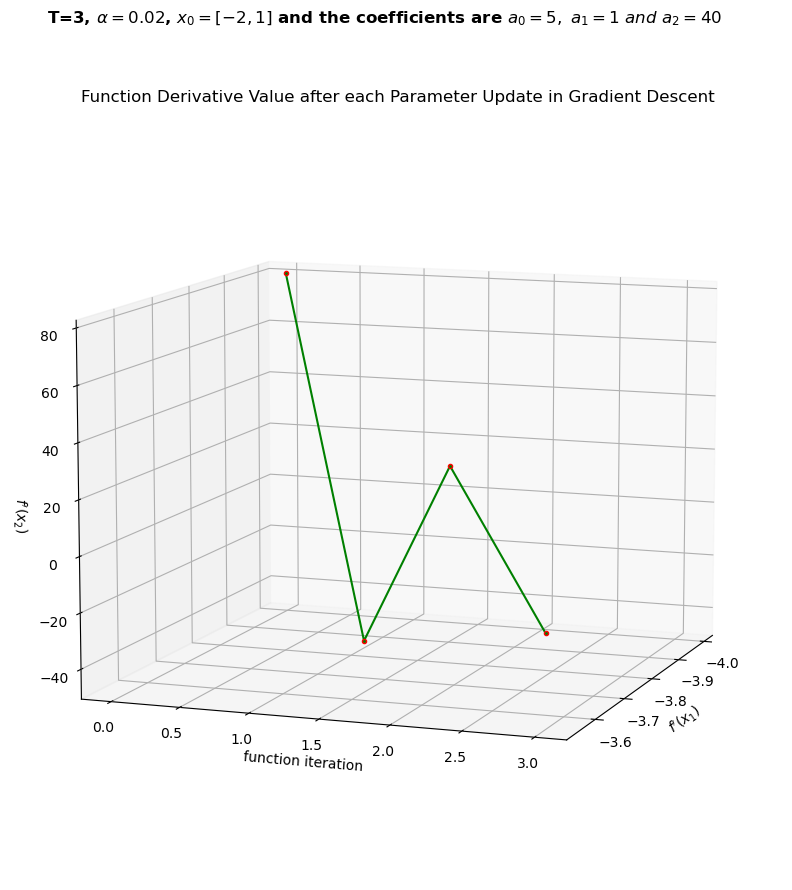


--------------------------------------------------------------------------------------------------------



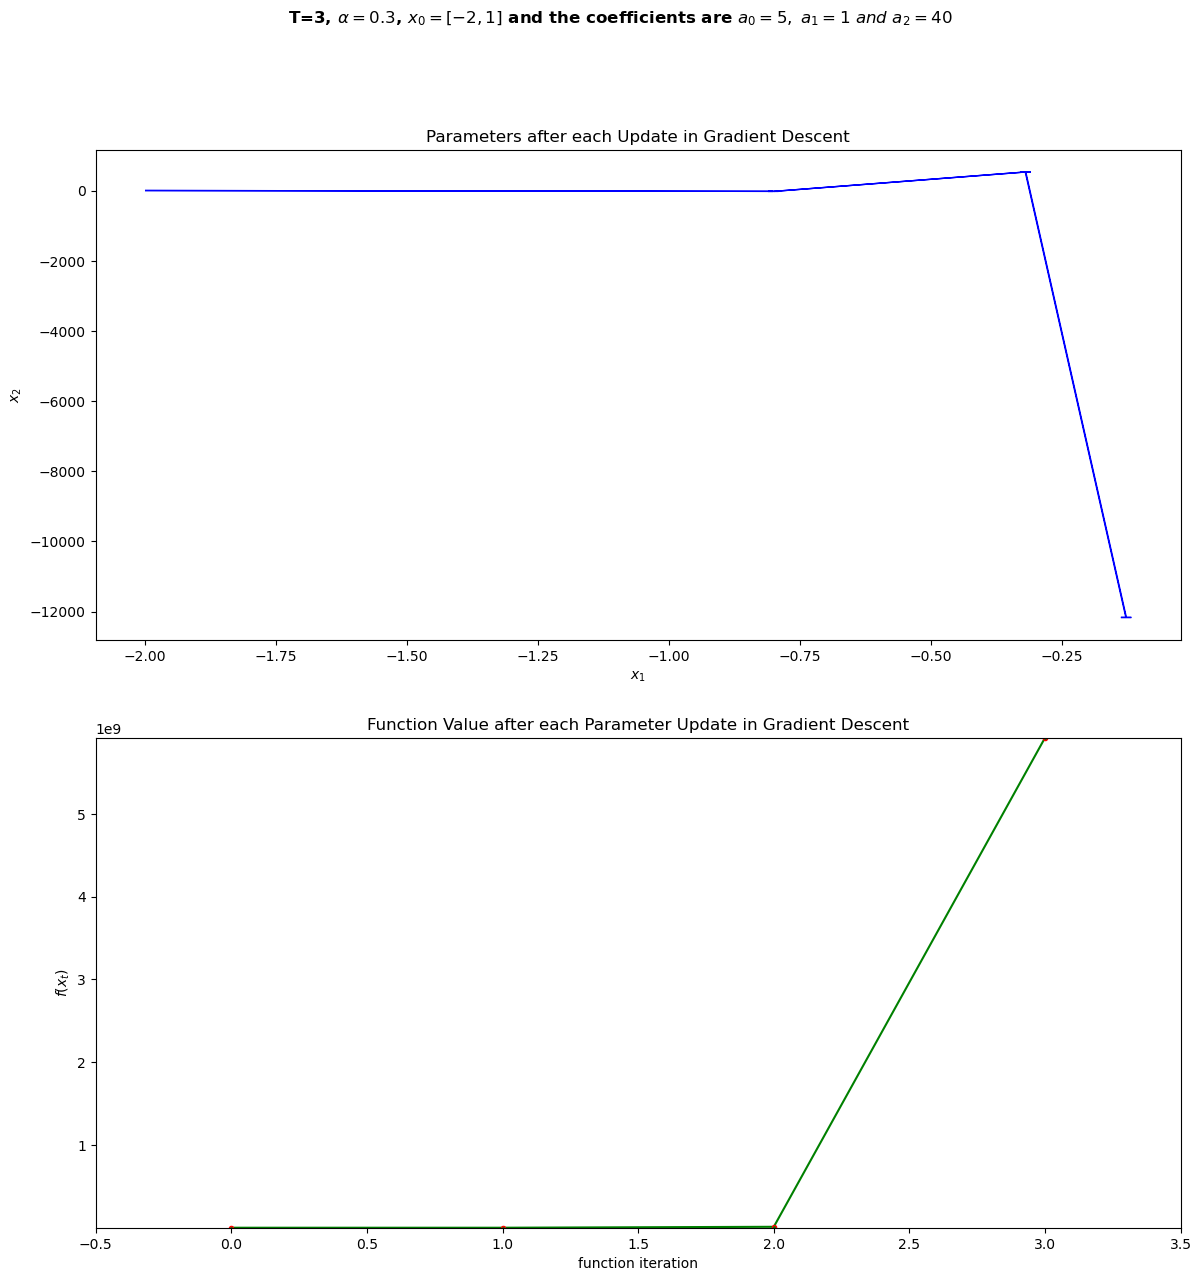

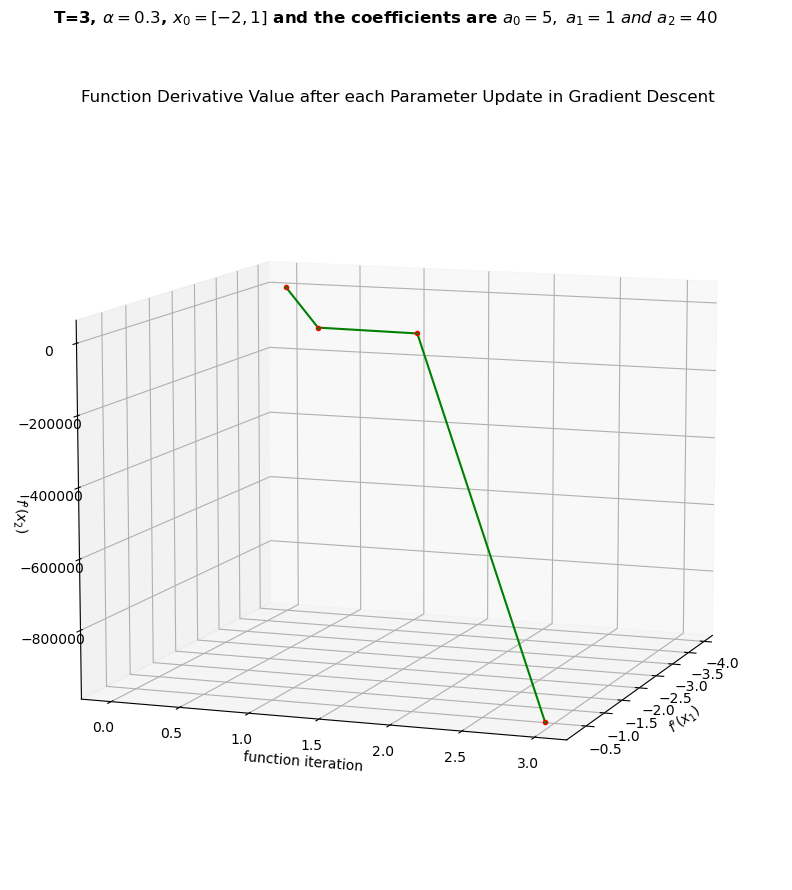


--------------------------------------------------------------------------------------------------------



In [357]:
draw_graphs_from_DataFrame(parameters, T[1])

<div style="font-size: 150%">
    <p>
        This time our $T$ is much smaller then last time ($T_{Current}=3$ as opposed to $T_{Previous}=20$). This means we make way less steps, therefore update way less. This results in a worse accuracy, meaning the final value is not as close to what it ideally should be.<br><br>
        Like with $T=20$, in the first three cases, where $\alpha$ equals 0.1, 0.2 and 0.3 in order, because a larger $\alpha$ means larger steps, we arrived at the extrimum's vicinity faster with the a larger $\alpha$.<br>
        In a stark difference to first three cases, the fourth and fifth cases show that the larger steps may make us overshoot and require us to adjust more in order to reach the same minimum, resulting in a longer time (more iterations needed) to arrive at the minimum.<br><br>
        You may notice that in the last case, we have a rather large $\alpha(=0.3)$, rather larger coefficient $(a_2 = 40)$, and as a result our function values bloat (going from $f(x_0)=49$ to $f(x_1)=21165.64$ to $f(x_2)=11193645.1024$ and $f(x_3)=5921435565.016384$).<br>
        Like before, what this tells us is that unlike in the fourth and fifth cases, where the larger $\alpha$ made us work harder to reach the same result, sometimes an $\alpha$ that is too large may make us go in a completely different direction (in this case, instead of getting smaller, as we approach a minimum, the function values increase, as if approaching a maximum or infinity (more on that later)).
    </p>
</div>



---



<h3>When T = 200</h3>

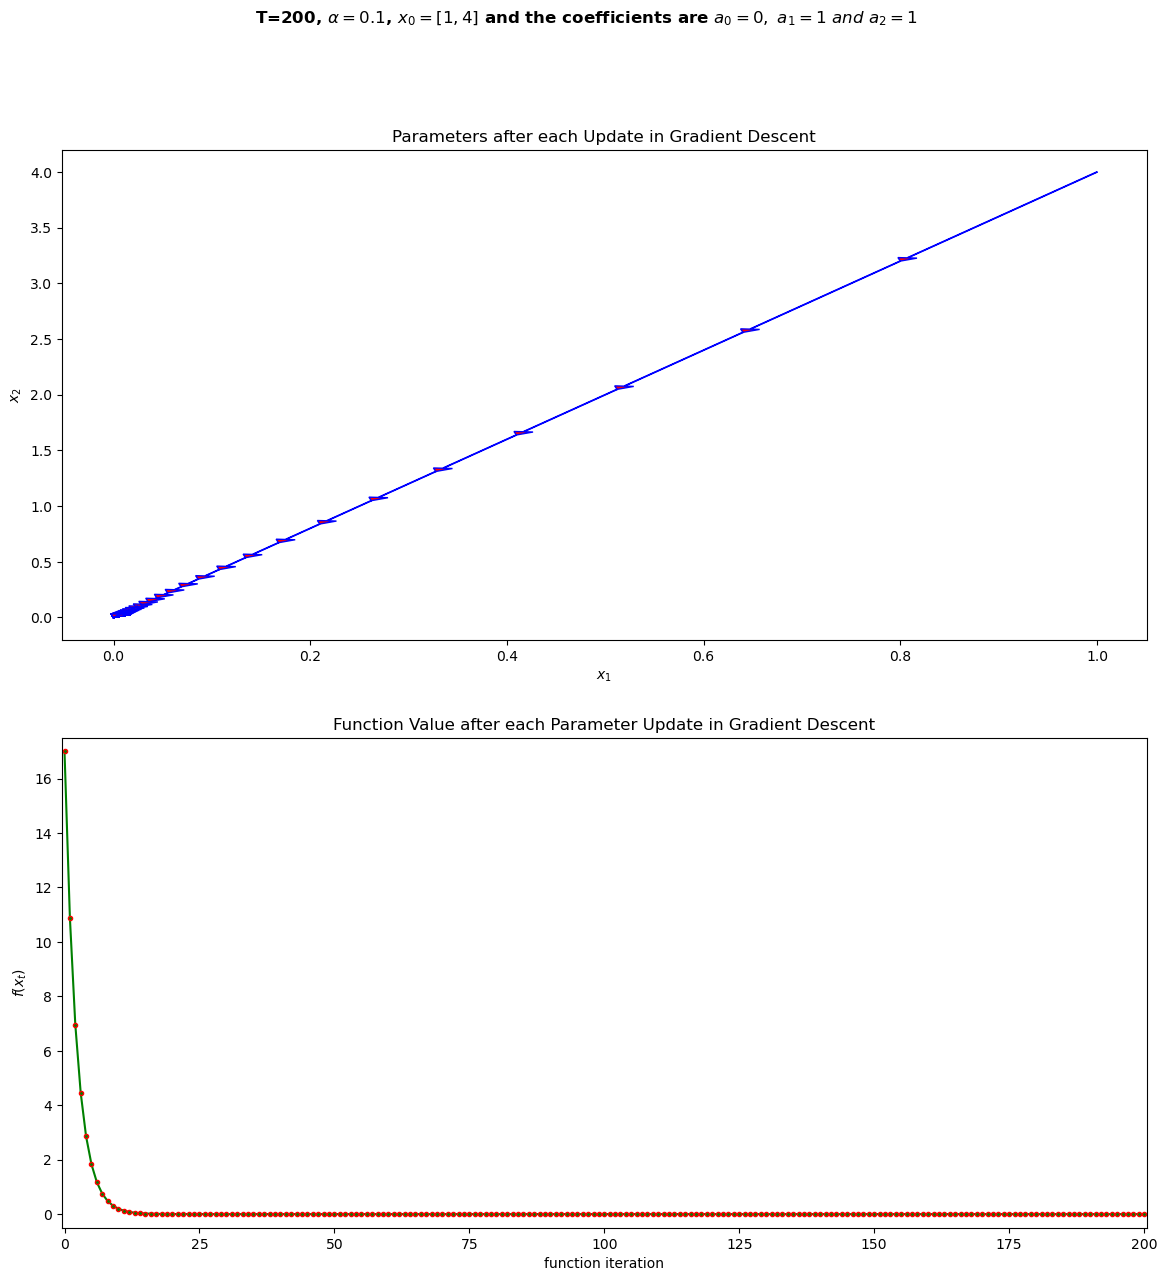

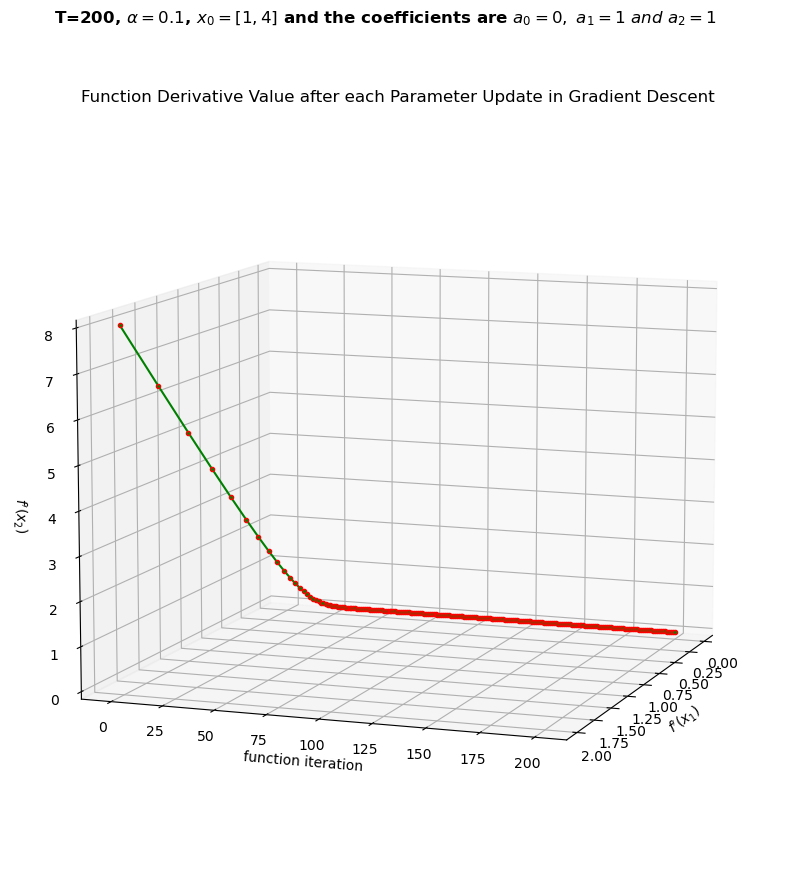


--------------------------------------------------------------------------------------------------------



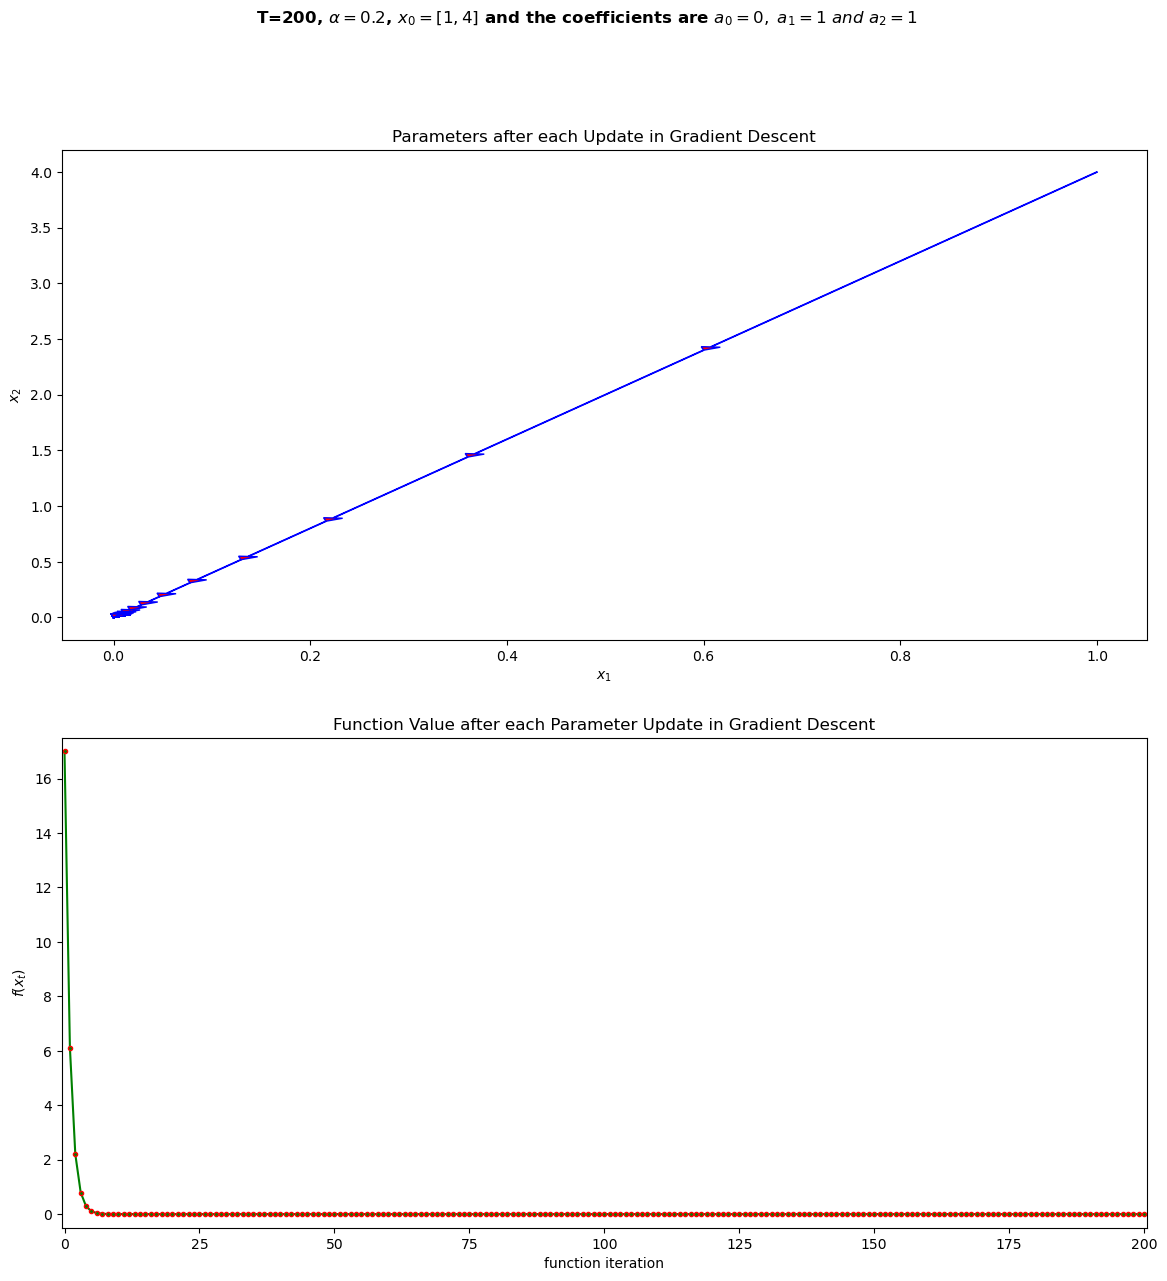

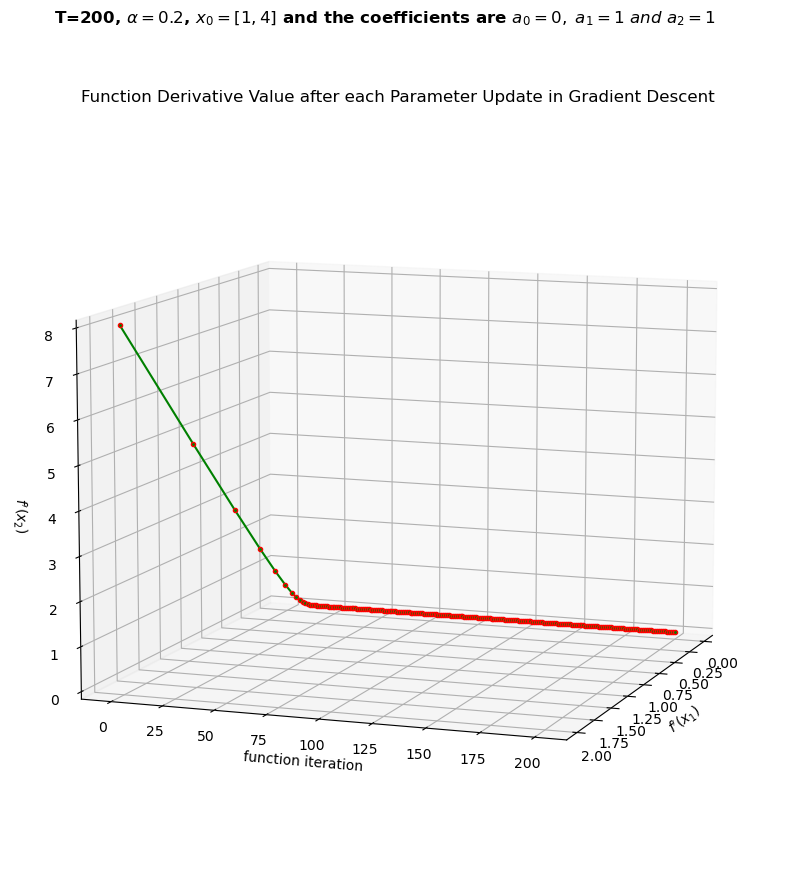


--------------------------------------------------------------------------------------------------------



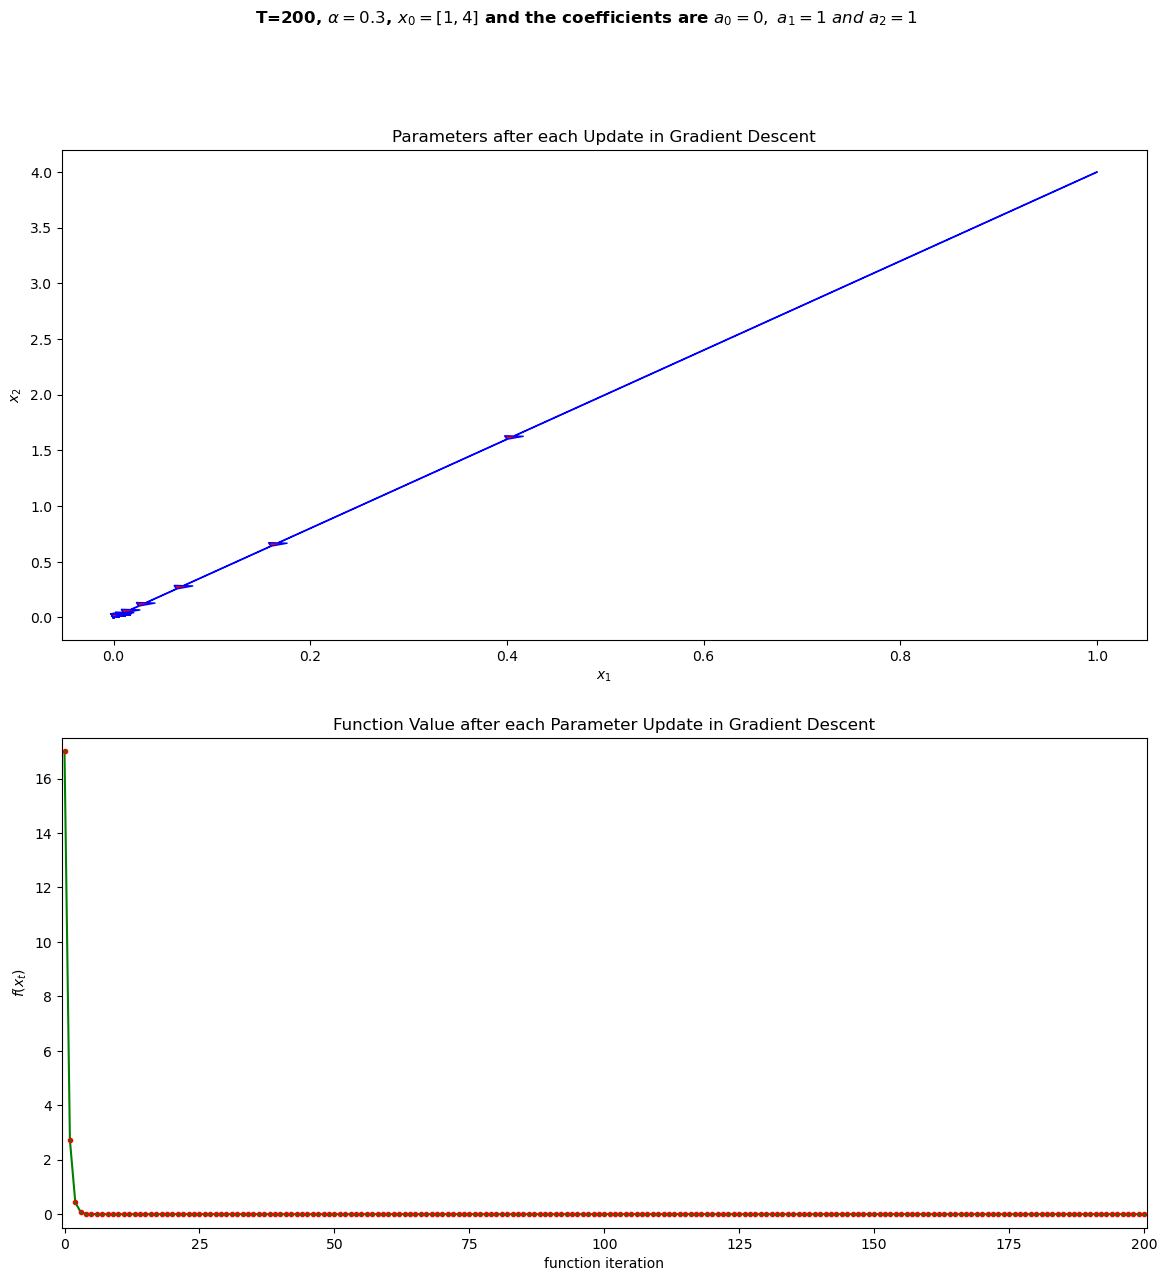

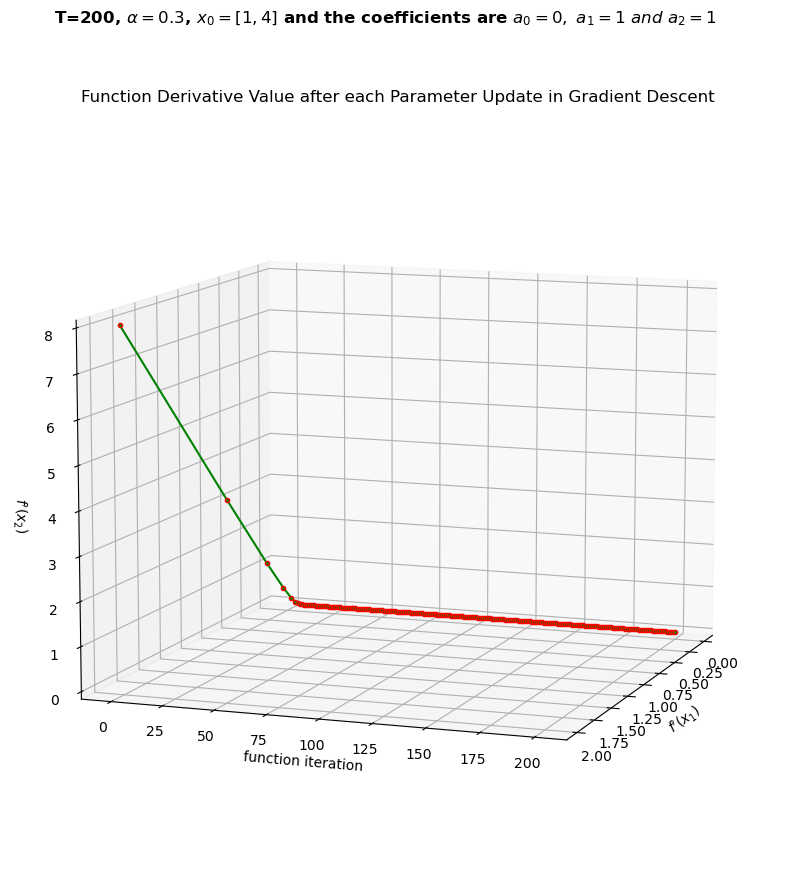


--------------------------------------------------------------------------------------------------------



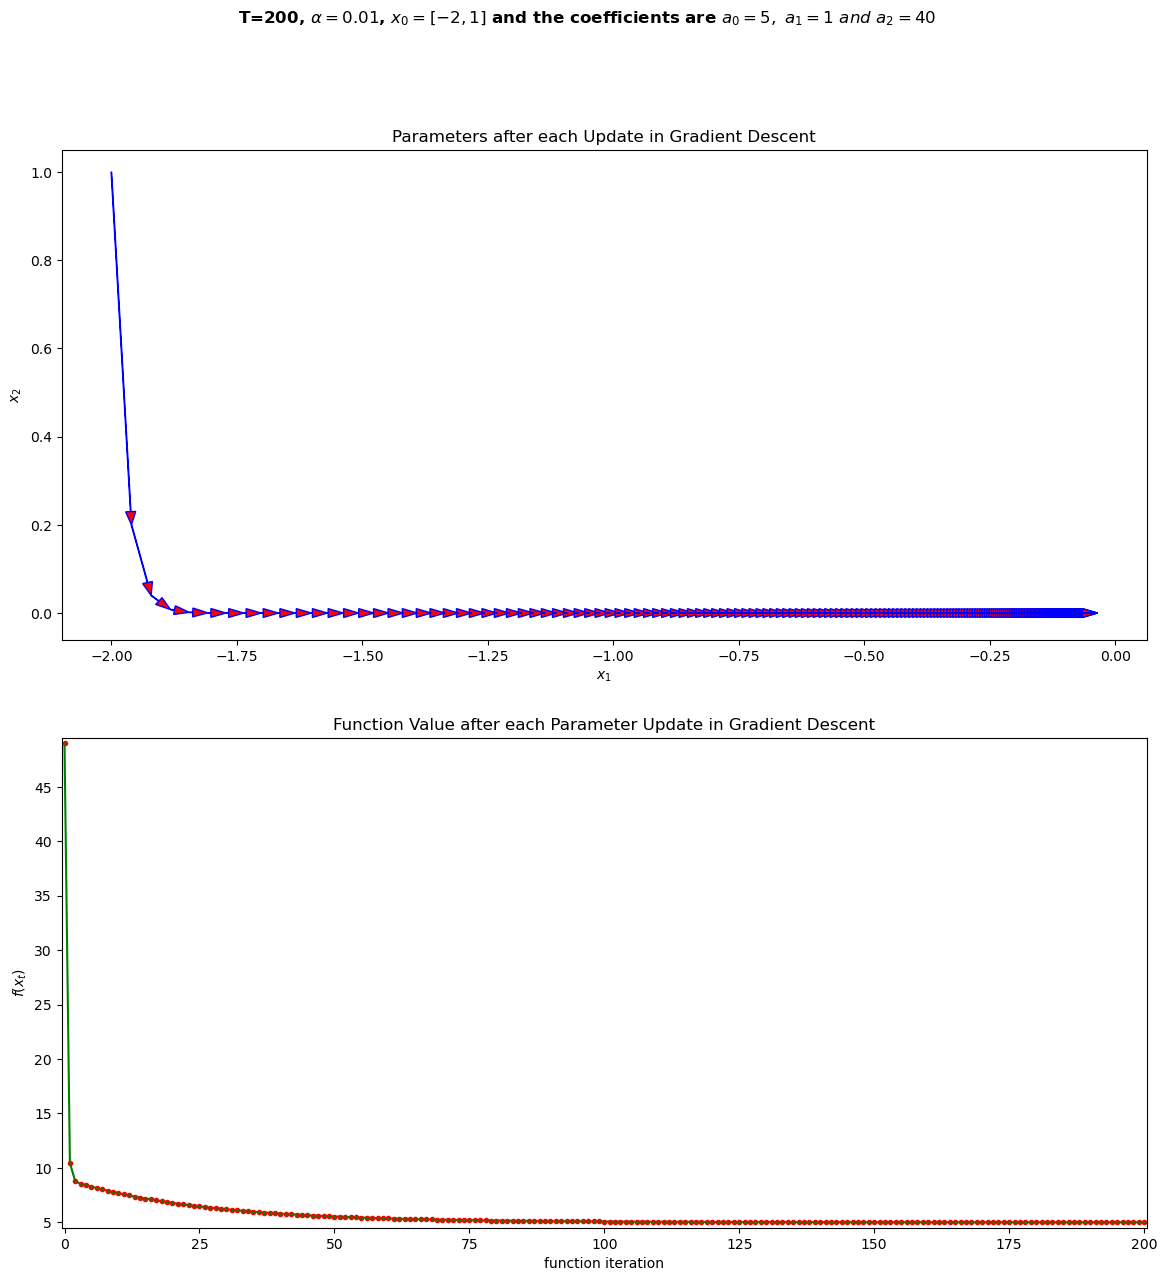

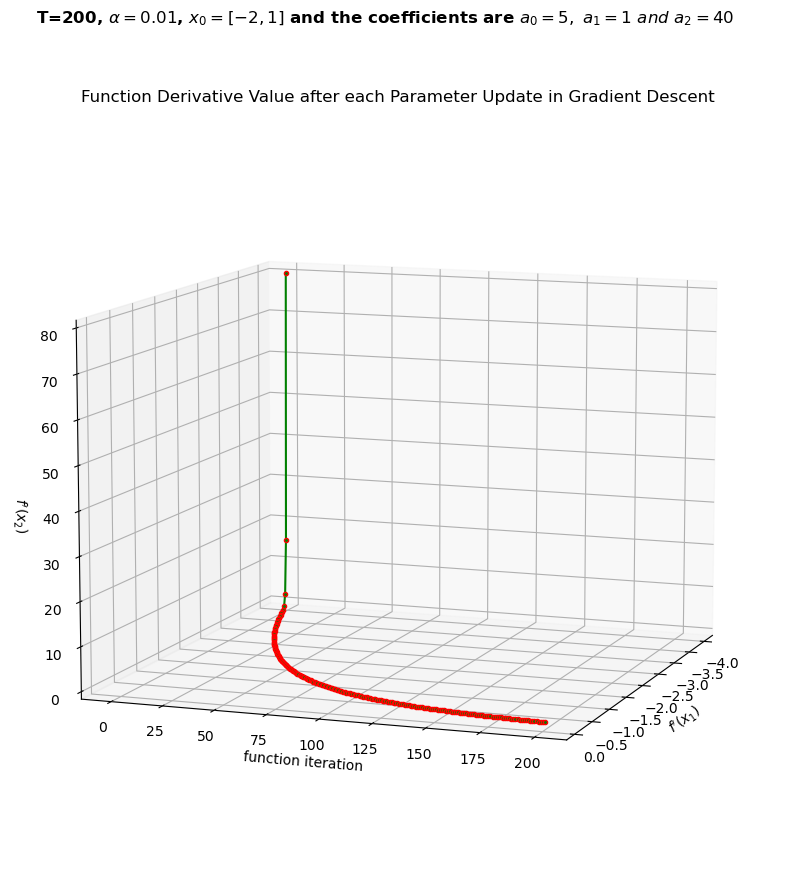


--------------------------------------------------------------------------------------------------------



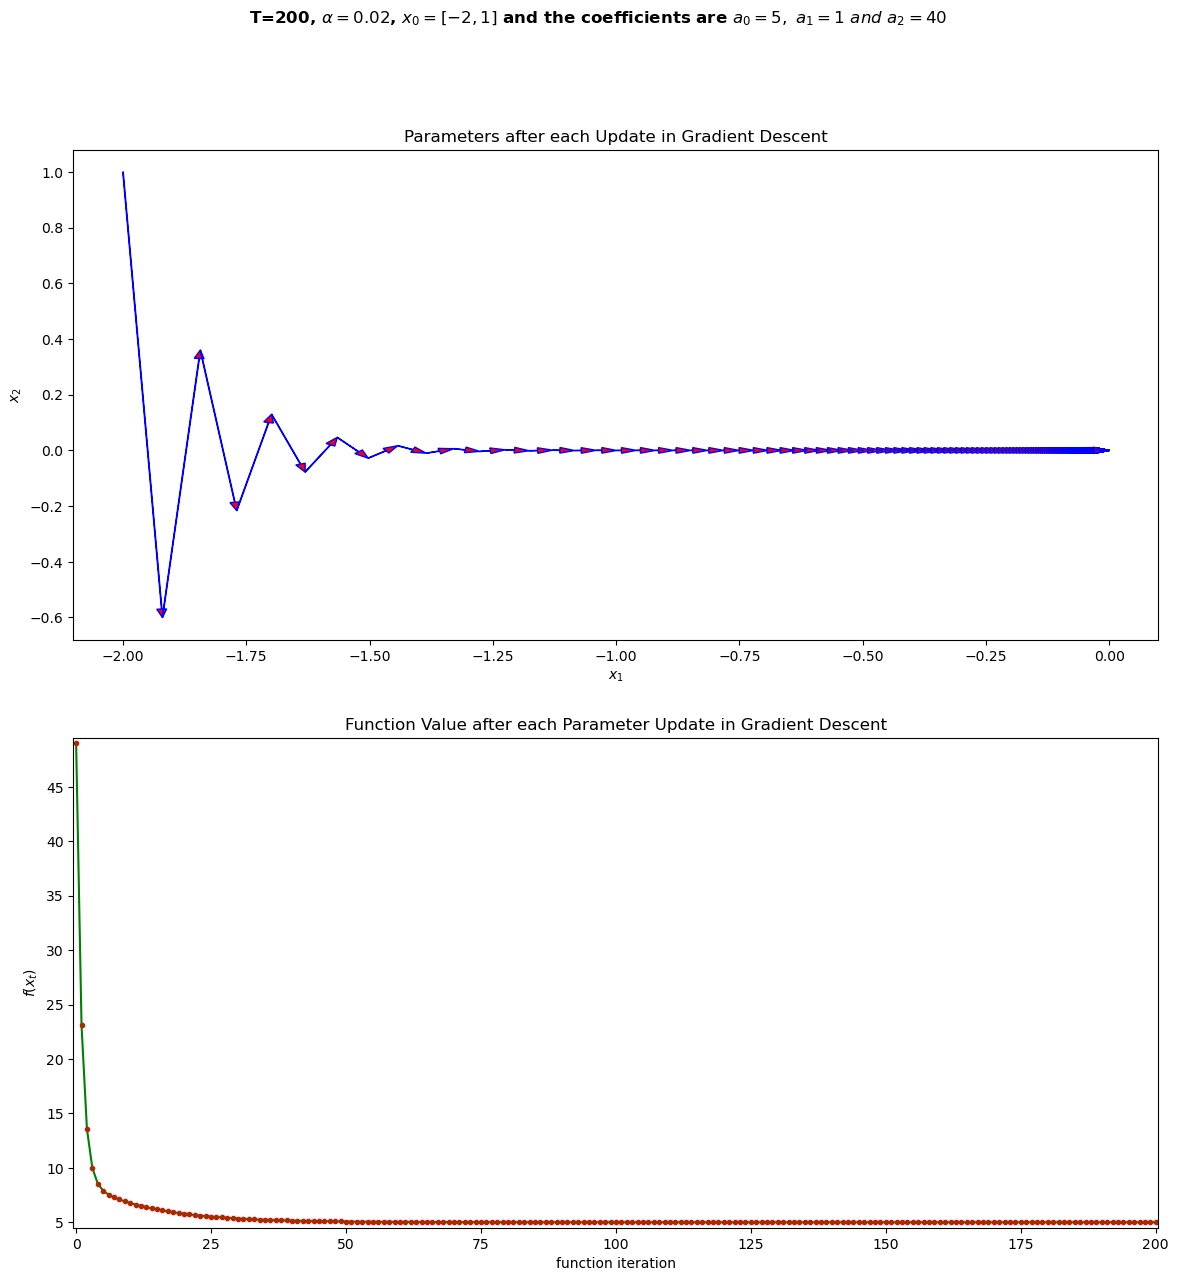

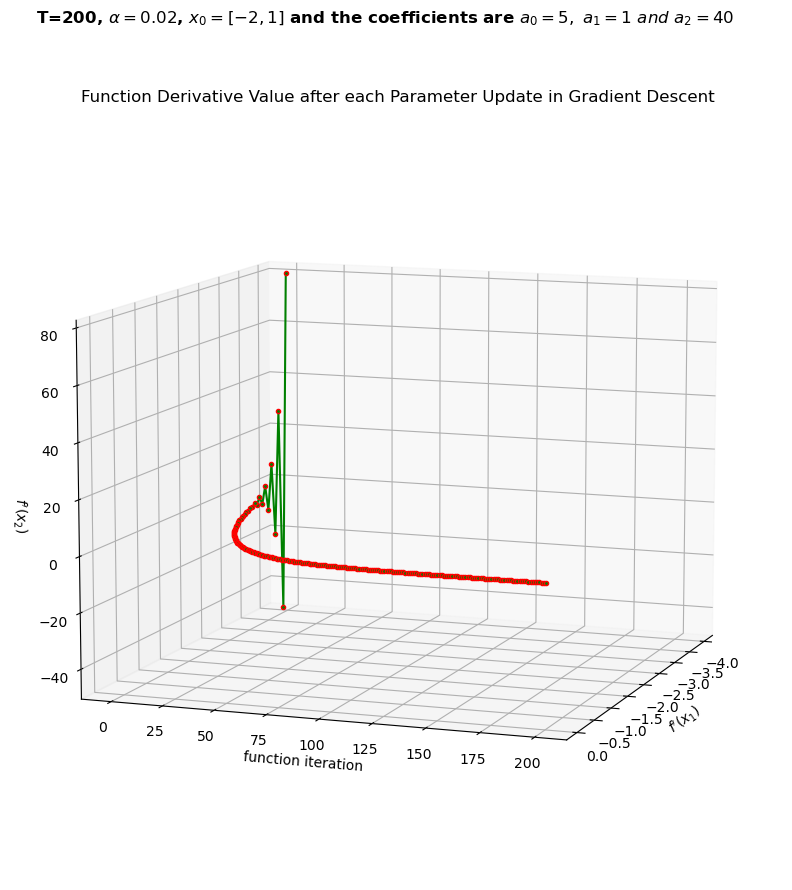


--------------------------------------------------------------------------------------------------------



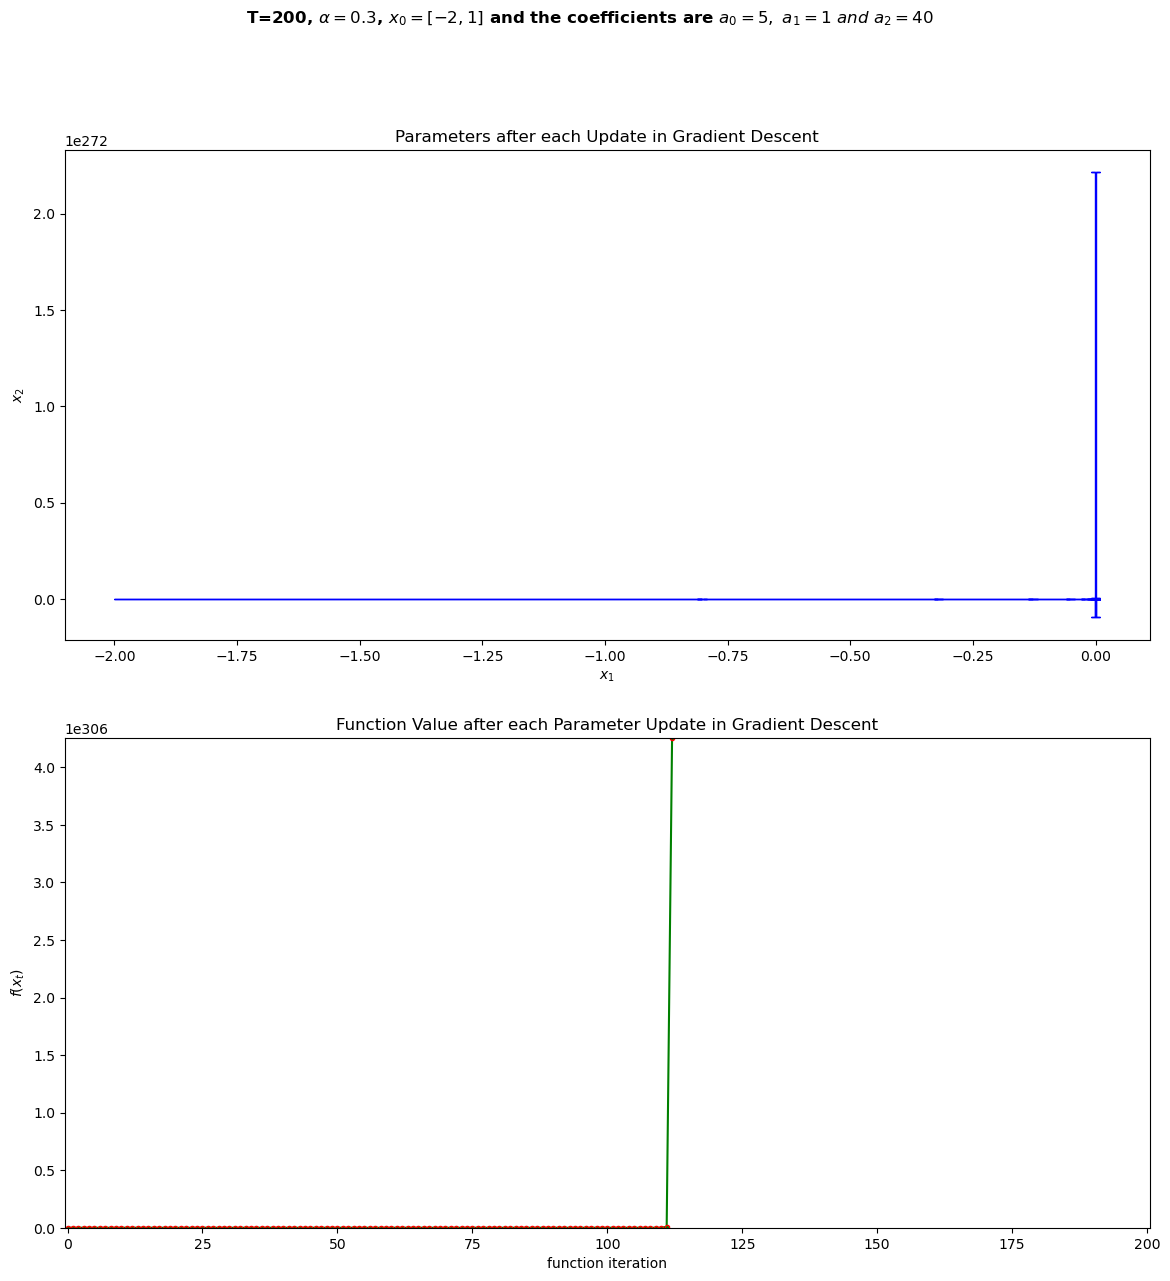

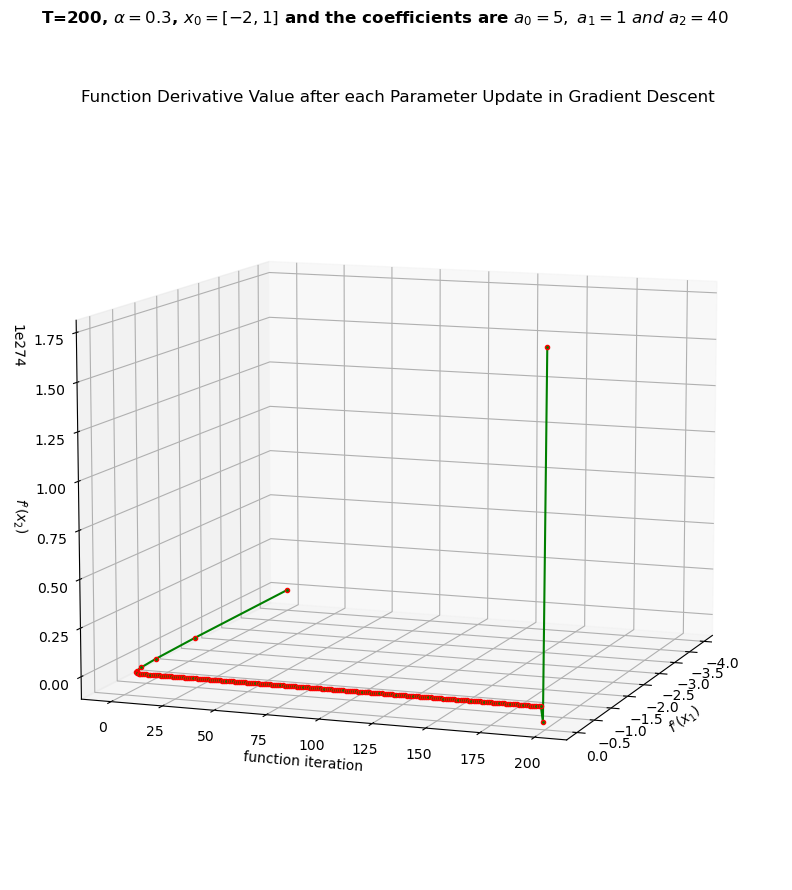


--------------------------------------------------------------------------------------------------------



In [358]:
draw_graphs_from_DataFrame(parameters, T[2])

<div style="font-size: 150%">
    <p>
        This time our $T$ is much much larger then the two previous times ($T_{Current}=200$ as opposed to $T_{Previous}=3$ or  $T_{Previous_{Previous}}=20$). This means we make way more steps, therefore update way more. This results in a much better accuracy, meaning the final value is alot closer to what it ideally should be.<br><br>
        Like with $T=20$ and $T=3$, in the first three cases, where $\alpha$ equals 0.1, 0.2 and 0.3 in order, because a larger $\alpha$ means larger steps, we arrived at the extrimum's vicinity faster with the a larger $\alpha$.<br>
        Unlike first three cases, the fourth and fifth cases show that the larger steps may make us overshoot and require us to adjust more in order to reach the same minimum, resulting in a longer time (more iterations needed) to arrive at the minimum.<br><br>
        An important thing to notice in the last case is that we arrive at a function value equaling Python's <code>math.inf</code> about halfway through our iterations.<br>
        This is in strict correlation to what we observed when $T=20$ and $T=3$. There we saw that we end with a function value that is really big, but finite.<br>
        In this case, where $T=200$ we start similar, with $f(x_0)=49$, $f(x_1)=21165.64$, $f(x_2)=11193645.1024$ and $f(x_3)=5921435565.016384$.<br>
        We continue to $f(x_{20})=1.1780763349694819\times 10^{56}$.<br>
        Then we press further, up to $f(x_{112})=4.256917752231812\times 10^{306}$, an unfathomably large number.<br>
        But after arriving there, we continue for 88 more iterations where the function value equals Python's <code>math.inf</code>.<br>
        Like before, what this tells us is that unlike in the fourth and fifth cases, where the larger $\alpha$ made us work harder to reach the same result, sometimes an $\alpha$ that is too large may make us go in a completely different direction (in this case, instead of getting smaller, as we approach a minimum, the function values increase, as if approaching a maximum or infinity).<br>
        This time, because we see we are ending up with infinity and not with a finite number we can infer that we are not approaching a maximum point. This means we are not approaching any extrimum.
    </p>
</div>



---



<div style="font-size: 150%">
    <p>
        From the differences in the results for each $T$ we can infer that the more iterations we run the Gradient Descent Algorithm (which translates to more updates), the closer we will end up next to an extrimum point (with our algorithm - a minimum one).<br>
        This, however, is also reliant on $\alpha$. With larger $\alpha$&#1470;s we make more radical (larger) adjustments, and depending on the number of iteration $T$, we might finish the process far from an extrimum.<br><br>
        Another thing to mention is the correlation between the starting point $x_0$ combined with the magnitude of $\alpha$ and the value we get at the end of the process.<br>
        With smaller $\alpha$&#1470;s, because we make smaller steps, we generally gravitate towards the extrimum closest to $x_0$. This is in contrast to the progress we make with larger $\alpha$&#1470;s, as whenever $\alpha$ is larger we make larger steps, and thus we may gravitate towards extrimum points that are further away from $x_0$.<br><br>
        We've also seen that, with some functions, $\alpha$&#1470;s that are too large (relatively) make it possible for us not to approach any extrimum at all.
    </p>
</div>